# Project -  Using ML to predict energy utilization of home appliances

***Regression used : Simple Linear and Polynomial Regression***

Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
%matplotlib inline

# Set the plot style and display options
plt.style.use('ggplot')
sns.set()

# To display all the columns in Dataframe
pd.set_option('display.max_columns', None)
# Import Library to visualise missing data
import missingno as mno

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

**Dataset**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the data set
data_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KAG_energydata_complete.csv')


In [ ]:
#creating a copy of data set
data = data_raw.copy()

In [ ]:
# Dataset First Look
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097

In [ ]:
# Dataset Rows & Columns count
num_rows, num_cols = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 19735
Number of columns: 29


Dataset **Information**

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# Assuming your date column is named "date_column"
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Setting date as the index:
data.set_index('date', inplace=True)

**Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count assinged a dataframe name 'df'
df = data[data.duplicated()]

In [ ]:
#There is no duplicate rows in the data
df.head()

Empty DataFrame
Columns: [Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

 Variables Description

In [ ]:
# Dataset Columns
data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include='all')

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

                 T5          RH_5            T6          RH_6            T7  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      19.592106     50.949283      7.910939     54.609083     20.267106   
std        1.844623      9.022034      6.090347     31.149806      2.109993   
min       15.330000     29.815000     -6.065000      1.000000     15.390000   
25%       18.277500     45.400000      3.626667     30.025000     18.700000   
50%       19.390000     49.090000      7.300000     55.290000     20.033333   
75%       20.619643     53.663333     11.256000     83.226667     21.600000   
max       25.795000     96.321667     28.290000     99.900000     26.000000   

               RH_7            T8          RH_8            T9          RH_9  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      35.388200     22.029107     42.936165     19.485828     41.552401   
std        5.114208      1.956162      5.224361      2.014712      4.151497   
min       23.200000     16.306667     29.600000     14.890000     29.166667   
25%       31.500000     20.790000     39.066667     18.000000     38.500000   
50%       34.863333     22.100000     42.375000     19.390000     40.900000   
75%       39.000000     23.390000     46.536000     20.600000     44.338095   
max       51.400000     27.230000     58.780000     24.500000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.411665    755.522602     79.750418      4.039752     38.330834   
std        5.317409      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.666667    750.933333     70.333333      2.000000     29.000000   
50%        6.916667    756.100000     83.666667      3.666667     40.000000   
75%       10.408333    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint           rv1           rv2  
count  19735.000000  19735.000000  19735.000000  
mean       3.760707     24.988033     24.988033  
std        4.194648     14.496634     14.496634  
min       -6.600000      0.005322      0.005322  
25%        0.900000     12.497889     12.497889  
50%        3.433333     24.897653     24.897653  
75%        6.566667     37.583769     37.583769  
max       15.500000     49.996530     49.996530

Unique Values for every variable.

In [ ]:
# Checking Unique Values count for each variable.
for i in data.columns.tolist():
  print("The unique values in",i, "is",data[i].nunique(),".")

The unique values in Appliances is 92 .
The unique values in lights is 8 .
The unique values in T1 is 722 .
The unique values in RH_1 is 2547 .
The unique values in T2 is 1650 .
The unique values in RH_2 is 3376 .
The unique values in T3 is 1426 .
The unique values in RH_3 is 2618 .
The unique values in T4 is 1390 .
The unique values in RH_4 is 2987 .
The unique values in T5 is 2263 .
The unique values in RH_5 is 7571 .
The unique values in T6 is 4446 .
The unique values in RH_6 is 9709 .
The unique values in T7 is 1955 .
The unique values in RH_7 is 5891 .
The unique values in T8 is 2228 .
The unique values in RH_8 is 6649 .
The unique values in T9 is 924 .
The unique values in RH_9 is 3388 .
The unique values in T_out is 1730 .
The unique values in Press_mm_hg is 2189 .
The unique values in RH_out is 566 .
The unique values in Windspeed is 189 .
The unique values in Visibility is 413 .
The unique values in Tdewpoint is 1409 .
The unique values in rv1 is 19735 .
The unique values in r

In [ ]:
# Round the unique values to two decimal places
rounded_unique_values = data.apply(lambda x: set(round(val, 2) for val in x))

# Print the unique values for each feature
for feature, unique in rounded_unique_values.items():
    print(f'{feature}: {unique}')

Appliances: {520, 10, 530, 20, 540, 30, 550, 40, 1070, 560, 50, 1080, 570, 60, 580, 70, 590, 80, 600, 90, 610, 100, 620, 110, 630, 120, 640, 130, 650, 140, 660, 150, 670, 160, 680, 170, 690, 180, 700, 190, 710, 200, 720, 210, 730, 220, 740, 230, 750, 240, 760, 250, 770, 260, 780, 270, 790, 280, 800, 290, 300, 820, 310, 830, 320, 840, 330, 850, 340, 860, 350, 870, 360, 880, 370, 890, 380, 900, 390, 910, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510}
lights: {0, 70, 40, 10, 50, 20, 60, 30}
T1: {23.47, 23.97, 23.72, 24.21, 24.71, 16.89, 17.89, 18.03, 18.53, 20.63, 21.12, 21.62, 23.02, 19.39, 19.27, 19.96, 20.7, 19.86, 20.89, 21.1, 23.07, 23.76, 24.0, 25.03, 26.03, 24.47, 24.22, 17.5, 17.0, 17.53, 18.5, 18.47, 18.0, 19.53, 19.03, 19.0, 19.5, 20.53, 20.03, 20.72, 20.22, 20.5, 21.03, 21.5, 21.53, 21.47, 21.0, 22.5, 22.0, 21.75, 21.25, 22.03, 23.0, 23.5, 23.03, 23.53, 22.53, 24.03, 23.22, 24.5, 24.53, 24.72, 25.5, 17.1, 25.0, 24.75, 25.53, 26.0, 23.66, 18.1, 24.16, 20.1, 22.65, 2

Data Wrangling

In [ ]:
# Separating columns:
temperature_column = [i for i in data.columns if "T" in i]
humidity_column = [i for i in data.columns if "RH" in i]
other = [i for i in data.columns if ("T" not in i)&("RH" not in i)]

In [ ]:
#close look on temprature column
data[temperature_column].describe(include='all')

T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9         T_out  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.910939     20.267106     22.029107     19.485828      7.411665   
std        6.090347      2.109993      1.956162      2.014712      5.317409   
min       -6.065000     15.390000     16.306667     14.890000     -5.000000   
25%        3.626667     18.700000     20.790000     18.000000      3.666667   
50%        7.300000     20.033333     22.100000     19.390000      6.916667   
75%       11.256000     21.600000     23.390000     20.600000     10.408333   
max       28.290000     26.000000     27.230000     24.500000     26.100000   

          Tdewpoint  
count  19735.000000  
mean       3.760707  
std        4.194648  
min       -6.600000  
25%        0.900000  
50%        3.433333  
75%        6.566667  
max       15.500000

In [ ]:
#close look on humidity column
data[humidity_column].describe()

RH_1          RH_2          RH_3          RH_4          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     40.420420     39.242500     39.026904     50.949283   
std        3.979299      4.069813      3.254576      4.341321      9.022034   
min       27.023333     20.463333     28.766667     27.660000     29.815000   
25%       37.333333     37.900000     36.900000     35.530000     45.400000   
50%       39.656667     40.500000     38.530000     38.400000     49.090000   
75%       43.066667     43.260000     41.760000     42.156667     53.663333   
max       63.360000     56.026667     50.163333     51.090000     96.321667   

               RH_6          RH_7          RH_8          RH_9        RH_out  
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  
mean      54.609083     35.388200     42.936165     41.552401     79.750418  
std       31.149806      5.114208      5.224361      4.151497     14.901088  
min        1.000000     23.200000     29.600000     29.166667     24.000000  
25%       30.025000     31.500000     39.066667     38.500000     70.333333  
50%       55.290000     34.863333     42.375000     40.900000     83.666667  
75%       83.226667     39.000000     46.536000     44.338095     91.666667  
max       99.900000     51.400000     58.780000     53.326667    100.000000

In [ ]:
data[other].describe()

Appliances        lights   Press_mm_hg     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875    755.522602      4.039752     38.330834   
std      102.524891      7.935988      7.399441      2.451221     11.794719   
min       10.000000      0.000000    729.300000      0.000000      1.000000   
25%       50.000000      0.000000    750.933333      2.000000     29.000000   
50%       60.000000      0.000000    756.100000      3.666667     40.000000   
75%      100.000000      0.000000    760.933333      5.500000     40.000000   
max     1080.000000     70.000000    772.300000     14.000000     66.000000   

                rv1           rv2  
count  19735.000000  19735.000000  
mean      24.988033     24.988033  
std       14.496634     14.496634  
min        0.005322      0.005322  
25%       12.497889     12.497889  
50%       24.897653     24.897653  
75%       37.583769     37.583769  
max       49.996530     49.996530

In [ ]:
# Create a dictionary to map current column names to new column names
column_mapping = {'T1': 'KITCHEN_TEMP',
    'RH_1': 'KITCHEN_HUM',
    'T2': 'LIVING_TEMP',
    'RH_2' :'LIVING_HUM',
    'T3': 'BEDROOM_TEMP',
    'RH_3':'BEDROOM_HUM',
    'T4' : 'OFFICE_TEMP',
    'RH_4' : 'OFFICE_HUM',
    'T5' : 'BATHROOM_TEMP',
    'RH_5': 'BATHROOM_HUM',
    'T6':'OUTSIDE_TEMP_build',
    'RH_6': 'OUTSIDE_HUM_build',
    'T7': 'IRONING_ROOM_TEMP',
    'RH_7' : 'IRONING_ROOM_HUM',
    'T8' :'TEEN_ROOM_2_TEMP',
    'RH_8' : 'TEEN_ROOM_HUM',
    'T9': 'PARENTS_ROOM_TEMP',
    'RH_9': 'PARENTS_ROOM_HUM',
    'T_out' :'OUTSIDE_TEMP_wstn',
    'RH_out' :'OUTSIDE_HUM_wstn'}

# Rename the columns using the mapping
data.rename(columns=column_mapping, inplace=True)

In [ ]:
data.head()

Appliances  lights  KITCHEN_TEMP  KITCHEN_HUM  \
date                                                                 
2016-01-11 17:00:00          60      30         19.89    47.596667   
2016-01-11 17:10:00          60      30         19.89    46.693333   
2016-01-11 17:20:00          50      30         19.89    46.300000   
2016-01-11 17:30:00          50      40         19.89    46.066667   
2016-01-11 17:40:00          60      40         19.89    46.333333   

                     LIVING_TEMP  LIVING_HUM  BEDROOM_TEMP  BEDROOM_HUM  \
date                                                                      
2016-01-11 17:00:00         19.2   44.790000         19.79    44.730000   
2016-01-11 17:10:00         19.2   44.722500         19.79    44.790000   
2016-01-11 17:20:00         19.2   44.626667         19.79    44.933333   
2016-01-11 17:30:00         19.2   44.590000         19.79    45.000000   
2016-01-11 17:40:00         19.2   44.530000         19.79    45.000000   

                     OFFICE_TEMP  OFFICE_HUM  BATHROOM_TEMP  BATHROOM_HUM  \
date                                                                        
2016-01-11 17:00:00    19.000000   45.566667      17.166667         55.20   
2016-01-11 17:10:00    19.000000   45.992500      17.166667         55.20   
2016-01-11 17:20:00    18.926667   45.890000      17.166667         55.09   
2016-01-11 17:30:00    18.890000   45.723333      17.166667         55.09   
2016-01-11 17:40:00    18.890000   45.530000      17.200000         55.09   

                     OUTSIDE_TEMP_build  OUTSIDE_HUM_build  IRONING_ROOM_TEMP  \
date                                                                            
2016-01-11 17:00:00            7.026667          84.256667          17.200000   
2016-01-11 17:10:00            6.833333          84.063333          17.200000   
2016-01-11 17:20:00            6.560000          83.156667          17.200000   
2016-01-11 17:30:00            6.433333          83.423333          17.133333   
2016-01-11 17:40:00            6.366667          84.893333          17.200000   

                     IRONING_ROOM_HUM  TEEN_ROOM_2_TEMP  TEEN_ROOM_HUM  \
date                                                                     
2016-01-11 17:00:00         41.626667              18.2      48.900000   
2016-01-11 17:10:00         41.560000              18.2      48.863333   
2016-01-11 17:20:00         41.433333              18.2      48.730000   
2016-01-11 17:30:00         41.290000              18.1      48.590000   
2016-01-11 17:40:00         41.230000              18.1      48.590000   

                     PARENTS_ROOM_TEMP  PARENTS_ROOM_HUM  OUTSIDE_TEMP_wstn  \
date                                                                          
2016-01-11 17:00:00          17.033333             45.53           6.600000   
2016-01-11 17:10:00          17.066667             45.56           6.483333   
2016-01-11 17:20:00          17.000000             45.50           6.366667   
2016-01-11 17:30:00          17.000000             45.40           6.250000   
2016-01-11 17:40:00          17.000000             45.40           6.133333   

                     Press_mm_hg  OUTSIDE_HUM_wstn  Windspeed  Visibility  \
date                                                                        
2016-01-11 17:00:00        733.5              92.0   7.000000   63.000000   
2016-01-11 17:10:00        733.6              92.0   6.666667   59.166667   
2016-01-11 17:20:00        733.7              92.0   6.333333   55.333333   
2016-01-11 17:30:00        733.8              92.0   6.000000   51.500000   
2016-01-11 17:40:00        733.9              92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  
date                                                  
2016-01-11 17:00:00        5.3  13.275433  13.275433  
2016-01-11 17:10:00        5.2  18.606195  18.606195  
2016-01-11 17:20:00        5.1  28.642668  28.642668  
2016-01-

In [ ]:
#creating new features
data['month'] = data.index.month
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
data['week'] = data.index.week
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek

In [ ]:
data.head(2)

Appliances  lights  KITCHEN_TEMP  KITCHEN_HUM  \
date                                                                 
2016-01-11 17:00:00          60      30         19.89    47.596667   
2016-01-11 17:10:00          60      30         19.89    46.693333   

                     LIVING_TEMP  LIVING_HUM  BEDROOM_TEMP  BEDROOM_HUM  \
date                                                                      
2016-01-11 17:00:00         19.2     44.7900         19.79        44.73   
2016-01-11 17:10:00         19.2     44.7225         19.79        44.79   

                     OFFICE_TEMP  OFFICE_HUM  BATHROOM_TEMP  BATHROOM_HUM  \
date                                                                        
2016-01-11 17:00:00         19.0   45.566667      17.166667          55.2   
2016-01-11 17:10:00         19.0   45.992500      17.166667          55.2   

                     OUTSIDE_TEMP_build  OUTSIDE_HUM_build  IRONING_ROOM_TEMP  \
date                                                                            
2016-01-11 17:00:00            7.026667          84.256667               17.2   
2016-01-11 17:10:00            6.833333          84.063333               17.2   

                     IRONING_ROOM_HUM  TEEN_ROOM_2_TEMP  TEEN_ROOM_HUM  \
date                                                                     
2016-01-11 17:00:00         41.626667              18.2      48.900000   
2016-01-11 17:10:00         41.560000              18.2      48.863333   

                     PARENTS_ROOM_TEMP  PARENTS_ROOM_HUM  OUTSIDE_TEMP_wstn  \
date                                                                          
2016-01-11 17:00:00          17.033333             45.53           6.600000   
2016-01-11 17:10:00          17.066667             45.56           6.483333   

                     Press_mm_hg  OUTSIDE_HUM_wstn  Windspeed  Visibility  \
date                                                                        
2016-01-11 17:00:00        733.5              92.0   7.000000   63.000000   
2016-01-11 17:10:00        733.6              92.0   6.666667   59.166667   

                     Tdewpoint        rv1        rv2  month  weekday  hour  \
date                                                                         
2016-01-11 17:00:00        5.3  13.275433  13.275433      1        0    17   
2016-01-11 17:10:00        5.2  18.606195  18.606195      1        0    17   

                     week  day  day_of_week  
date                                         
2016-01-11 17:00:00     2   11            0  
2016-01-11 17:10:00     2   11            0

In [ ]:
# Counting values of the "lights" column:
data['lights'].value_counts(normalize=True)

0     0.772840
10    0.112085
20    0.082290
30    0.028325
40    0.003902
50    0.000456
70    0.000051
60    0.000051
Name: lights, dtype: float64

Not relevant for prediction so dropping this column

In [ ]:
# Dropping the lights column:
data.drop(columns='lights', inplace=True)

In [ ]:
#reorder the data for clear vision
desired_order = ['KITCHEN_TEMP','LIVING_TEMP','BEDROOM_TEMP','OFFICE_TEMP','BATHROOM_TEMP','OUTSIDE_TEMP_build','IRONING_ROOM_TEMP','TEEN_ROOM_2_TEMP','PARENTS_ROOM_TEMP','OUTSIDE_TEMP_wstn',
                 'KITCHEN_HUM','LIVING_HUM','BEDROOM_HUM','OFFICE_HUM','BATHROOM_HUM','OUTSIDE_HUM_build','IRONING_ROOM_HUM','TEEN_ROOM_HUM','PARENTS_ROOM_HUM','OUTSIDE_HUM_wstn',
                 "Tdewpoint","Press_mm_hg","Windspeed","Visibility","rv1", "rv2",'month','weekday','hour','week','day','day_of_week',"Appliances"]
#assinging new_data as new name of dataframe
data = data.reindex(columns=desired_order)

In [ ]:
data.tail(2)

KITCHEN_TEMP  LIVING_TEMP  BEDROOM_TEMP  OFFICE_TEMP  \
date                                                                        
2016-05-27 17:50:00          25.5    25.414000     26.890000         24.7   
2016-05-27 18:00:00          25.5    25.264286     26.823333         24.7   

                     BATHROOM_TEMP  OUTSIDE_TEMP_build  IRONING_ROOM_TEMP  \
date                                                                        
2016-05-27 17:50:00           23.2           22.433333               24.5   
2016-05-27 18:00:00           23.2           21.026667               24.5   

                     TEEN_ROOM_2_TEMP  PARENTS_ROOM_TEMP  OUTSIDE_TEMP_wstn  \
date                                                                          
2016-05-27 17:50:00           24.6625               23.2          22.333333   
2016-05-27 18:00:00           24.7360               23.2          22.200000   

                     KITCHEN_HUM  LIVING_HUM  BEDROOM_HUM  OFFICE_HUM  \
date                                                                    
2016-05-27 17:50:00        46.99   43.036000    41.290000   45.790000   
2016-05-27 18:00:00        46.60   42.971429    41.156667   45.963333   

                     BATHROOM_HUM  OUTSIDE_HUM_build  IRONING_ROOM_HUM  \
date                                                                     
2016-05-27 17:50:00          52.2                1.0         44.295714   
2016-05-27 18:00:00          52.2                1.0         44.054000   

                     TEEN_ROOM_HUM  PARENTS_ROOM_HUM  OUTSIDE_HUM_wstn  \
date                                                                     
2016-05-27 17:50:00       49.51875           46.8175         56.666667   
2016-05-27 18:00:00       49.73600           46.8450         57.000000   

                     Tdewpoint  Press_mm_hg  Windspeed  Visibility        rv1  \
date                                                                            
2016-05-27 17:50:00  13.233333        755.2   3.833333   26.166667   6.322784   
2016-05-27 18:00:00  13.200000        755.2   4.000000   27.000000  34.118851   

                           rv2  month  weekday  hour  week  day  day_of_week  \
date                                                                           
2016-05-27 17:50:00   6.322784      5        4    17    21   27            4   
2016-05-27 18:00:00  34.118851      5        4    18    21   27            4   

                     Appliances  
date                             
2016-05-27 17:50:00         420  
2016-05-27 18:00:00         430

In [ ]:
#AUTOEDA
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(data)
sweet_report.show_html('sweet_report.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 77.0 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Data Vizualization :relationships between variables

Chart - 1

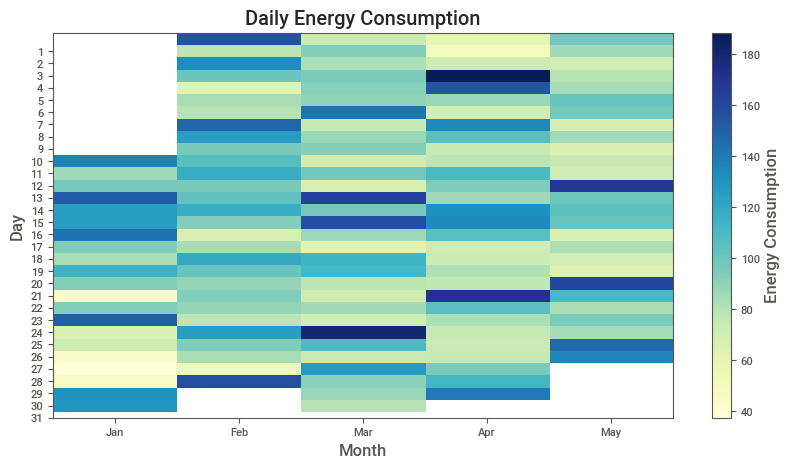

In [ ]:
# Create a pivot table to aggregate the daily energy consumption
daily_energy = data.pivot_table(values='Appliances', index='day', columns='month', aggfunc = 'mean')

# Create a heatmap using the pivot table
plt.figure(figsize=(10, 5))
plt.title('Daily Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Day')
plt.imshow(daily_energy, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Energy Consumption')
plt.xticks(range(0,5), ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.yticks(range(1, 32))
plt.show()


Chart - 2

Text(0, 0.5, 'Energy Consumption')

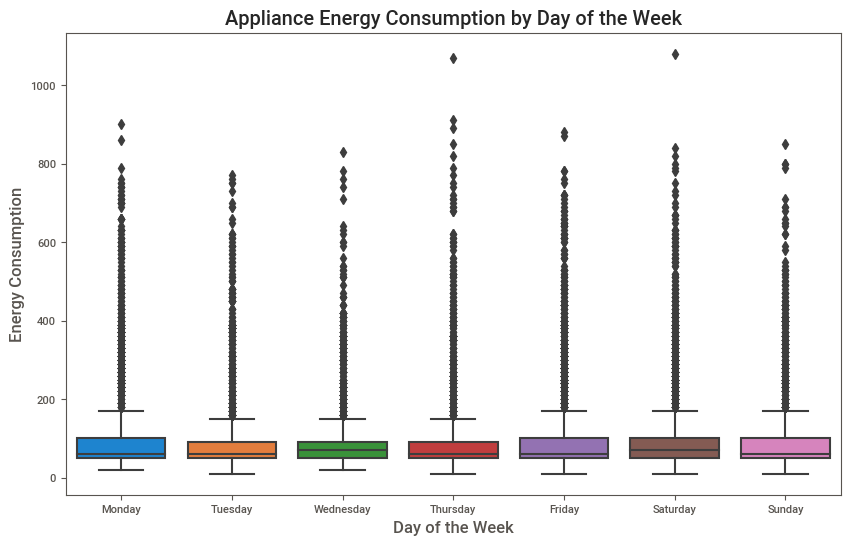

In [ ]:
# Map the day of the week values to their respective names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_week'] = data['day_of_week'].map(lambda x: day_names[x])

# Create a box plot or violin plot to compare energy consumption across different days of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='Appliances', data=data, order=day_names)  # or sns.violinplot()
plt.title('Appliance Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption')

Chart - 3

In [ ]:
# Create a line plot to show the trend of energy consumption over time
import plotly.express as px

# Assuming you have a DataFrame 'data' with a datetime index
fig = px.line(data, x=data.index, y='Appliances', title='Energy Consumption of Appliances Over Time')
fig.update_xaxes(title_text='Date', tickangle=-45)
fig.update_yaxes(title_text='Energy Consumption')

# Show the Plotly figure
fig.show()


Chart - 4

In [ ]:
# Dropping the lights column:
data.drop(columns='day_of_week', inplace=True)

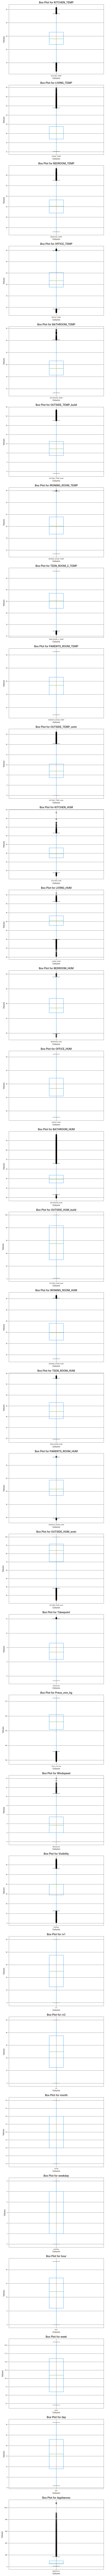

In [ ]:
# Chart - 4 visualization code
# Examining the outlier in the dataset
# Assuming 'data' is your DataFrame
num_columns = len(data.columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(8, num_columns*6))

for i, column in enumerate(data.columns):
    # Exclude 'day_of_week' from the visualization
    if column != 'day_of_week':
        data.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')
        axes[i].set_xlabel('Column')
        axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


Chart - 5

In [ ]:
# Chart - 5 visualization code
#close look on four columns
fig_sub = make_subplots(rows=1, cols=4, shared_yaxes=False)

fig_sub.add_trace(go.Box(y=data['Appliances'].values,name='Appliances'),row=1, col=1)
fig_sub.add_trace(go.Box(y=data['Windspeed'].values,name='Windspeed'),row=1, col=2)
fig_sub.add_trace(go.Box(y=data['Visibility'].values,name='Visibility'),row=1, col=3)
fig_sub.add_trace(go.Box(y=data['Press_mm_hg'].values,name='Press_mm_hg'),row=1, col=4)

fig_sub.show()

Chart - 6

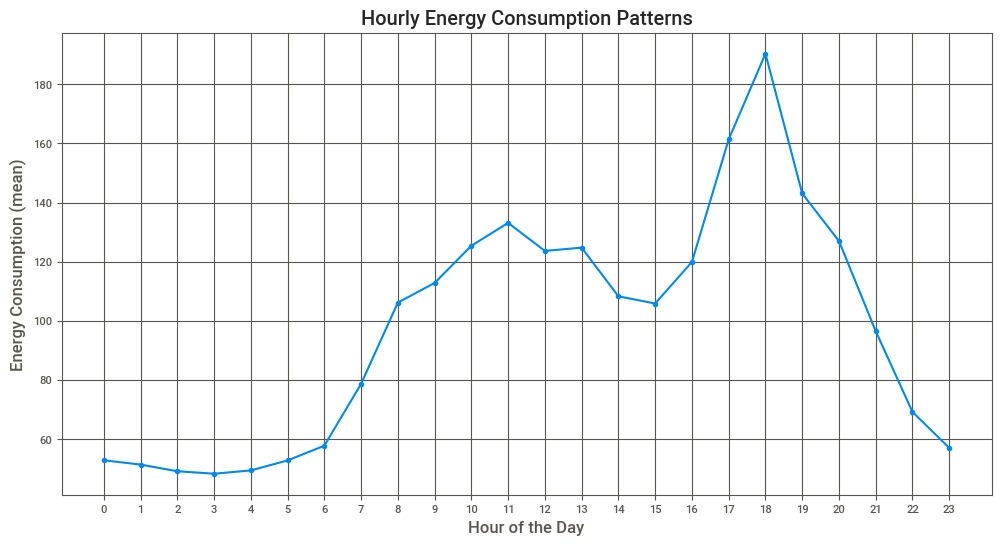

In [ ]:
# Chart - 6 visualization code
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the energy consumption data
# You can group the data by hour and calculate the mean energy consumption for each hour
hourly_energy = data.groupby('hour')['Appliances'].mean()

# Create a line chart to visualize the hourly energy consumption patterns
plt.figure(figsize=(12, 6))
plt.plot(hourly_energy.index, hourly_energy.values, marker='o', linestyle='-')
plt.title('Hourly Energy Consumption Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (mean)')
plt.xticks(range(24))
plt.grid(True)
plt.show()


Chart-7

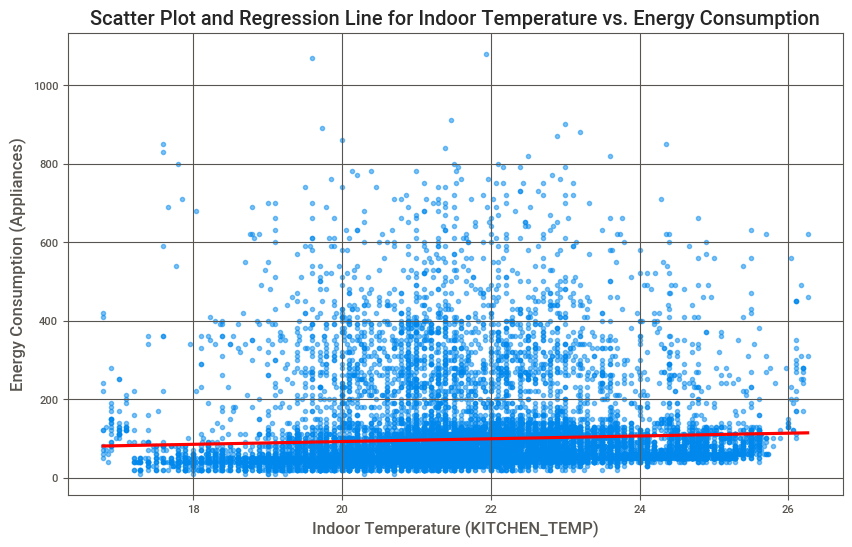

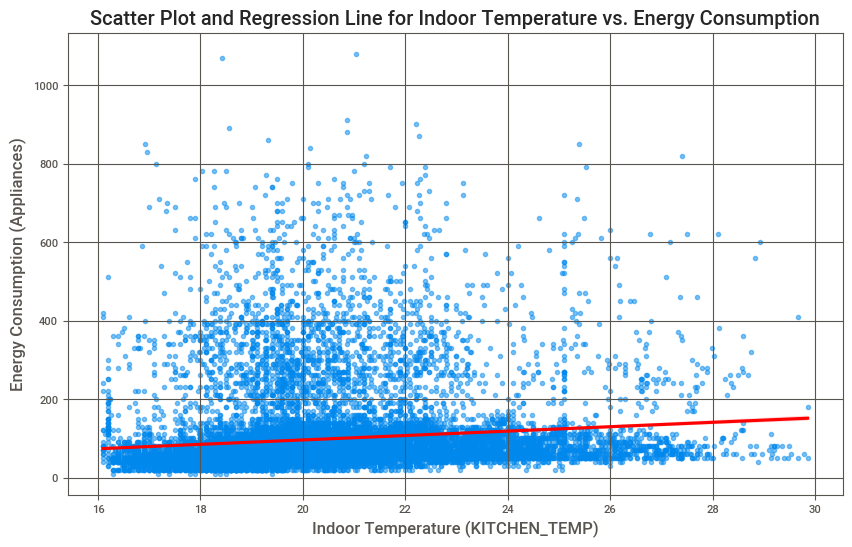

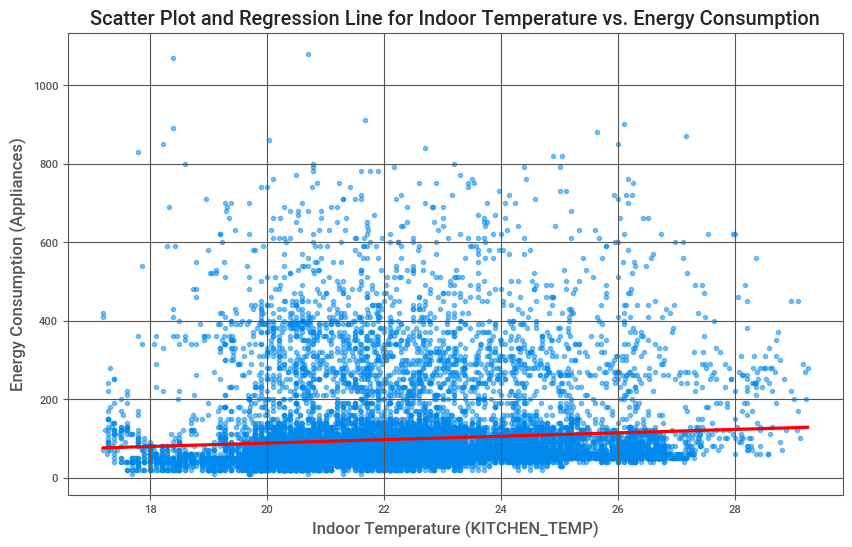

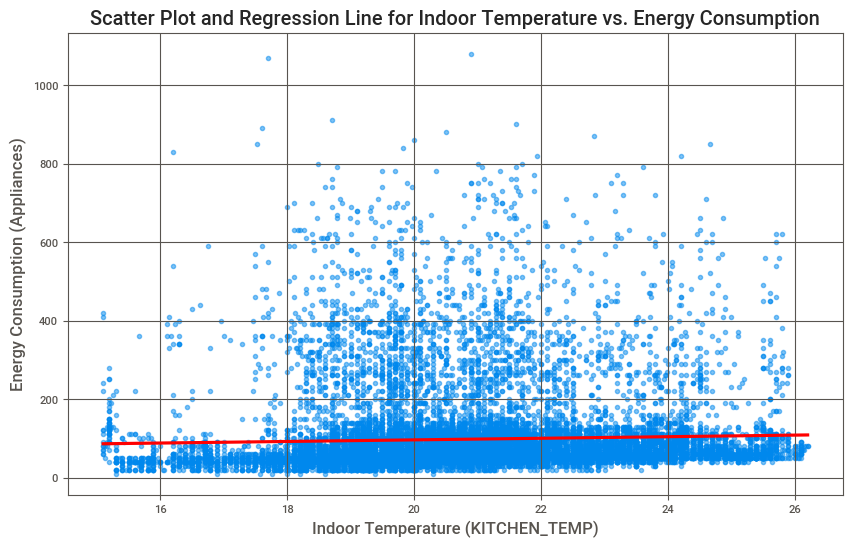

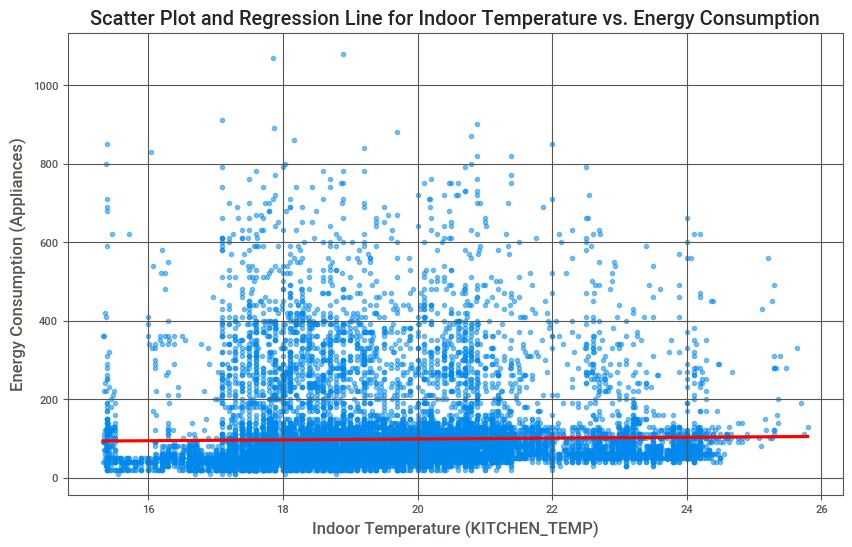

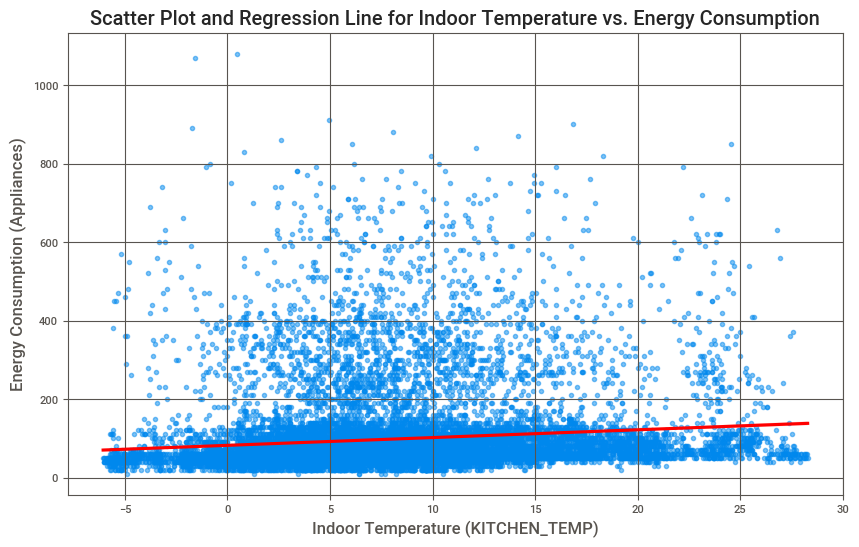

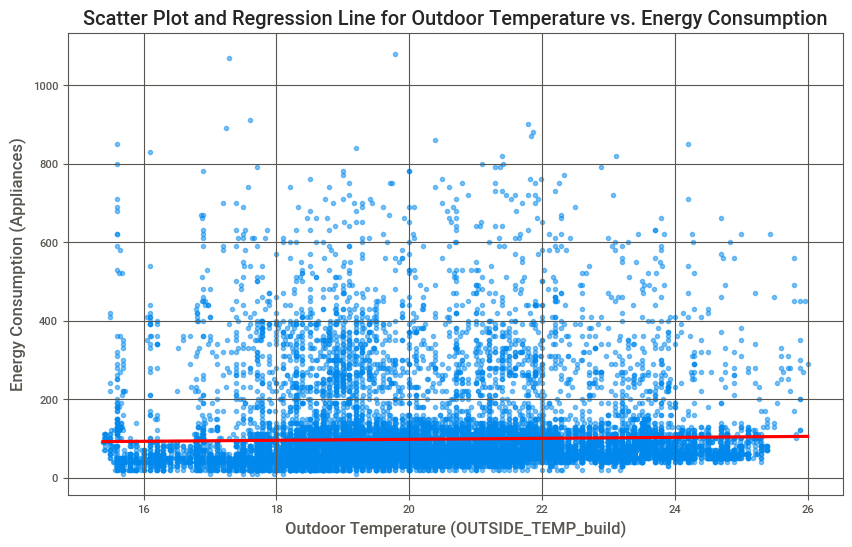

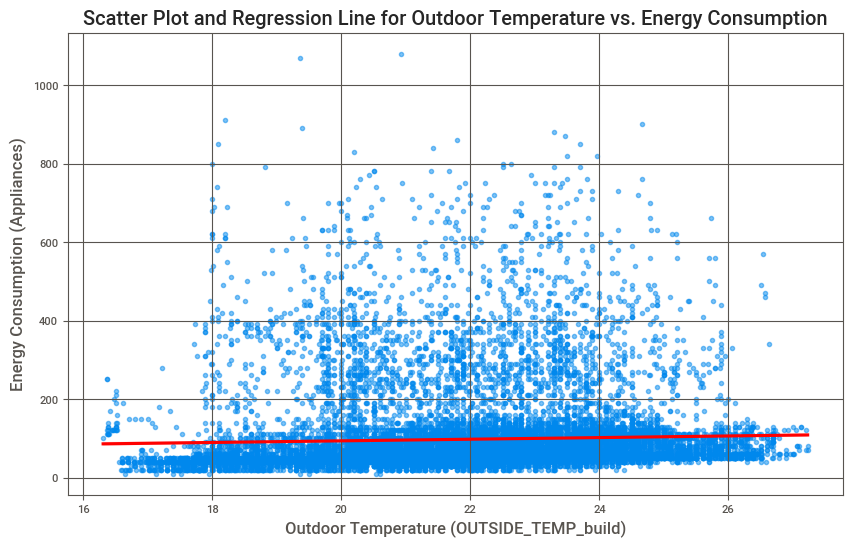

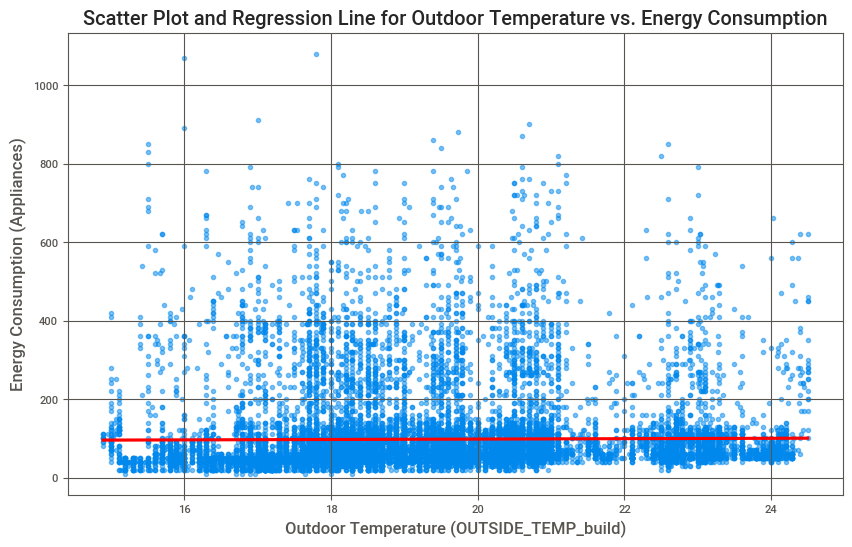

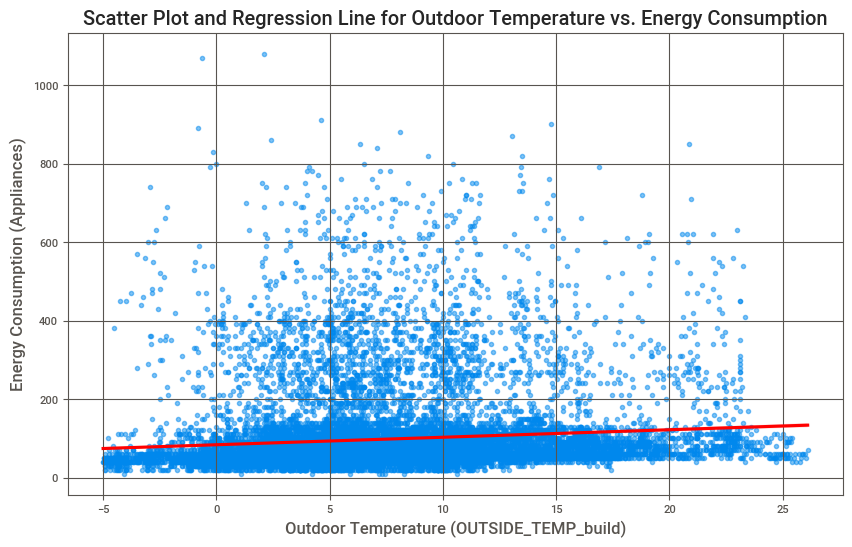

In [ ]:
# Chart - 7 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns (e.g., 'KITCHEN_TEMP', 'OUTSIDE_TEMP_build', and 'Appliances')
# You can create a scatter plot with a regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='KITCHEN_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Indoor Temperature vs. Energy Consumption')
plt.xlabel('Indoor Temperature (KITCHEN_TEMP)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can create a scatter plot with a regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='LIVING_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Indoor Temperature vs. Energy Consumption')
plt.xlabel('Indoor Temperature (KITCHEN_TEMP)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can create a scatter plot with a regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='BEDROOM_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Indoor Temperature vs. Energy Consumption')
plt.xlabel('Indoor Temperature (KITCHEN_TEMP)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can create a scatter plot with a regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='OFFICE_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Indoor Temperature vs. Energy Consumption')
plt.xlabel('Indoor Temperature (KITCHEN_TEMP)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can create a scatter plot with a regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='BATHROOM_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Indoor Temperature vs. Energy Consumption')
plt.xlabel('Indoor Temperature (KITCHEN_TEMP)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can create a scatter plot with a regression line for outdoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='OUTSIDE_TEMP_build', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Indoor Temperature vs. Energy Consumption')
plt.xlabel('Indoor Temperature (KITCHEN_TEMP)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can also create a similar scatter plot and regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='IRONING_ROOM_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Outdoor Temperature vs. Energy Consumption')
plt.xlabel('Outdoor Temperature (OUTSIDE_TEMP_build)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can also create a similar scatter plot and regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='TEEN_ROOM_2_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Outdoor Temperature vs. Energy Consumption')
plt.xlabel('Outdoor Temperature (OUTSIDE_TEMP_build)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can also create a similar scatter plot and regression line for indoor temperature vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='PARENTS_ROOM_TEMP', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Outdoor Temperature vs. Energy Consumption')
plt.xlabel('Outdoor Temperature (OUTSIDE_TEMP_build)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

# You can also create a similar scatter plot and regression line for outdoor temperature data from weather station vs. energy consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='OUTSIDE_TEMP_wstn', y='Appliances', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line for Outdoor Temperature vs. Energy Consumption')
plt.xlabel('Outdoor Temperature (OUTSIDE_TEMP_build)')
plt.ylabel('Energy Consumption (Appliances)')
plt.grid(True)

plt.show()


Chart - 8

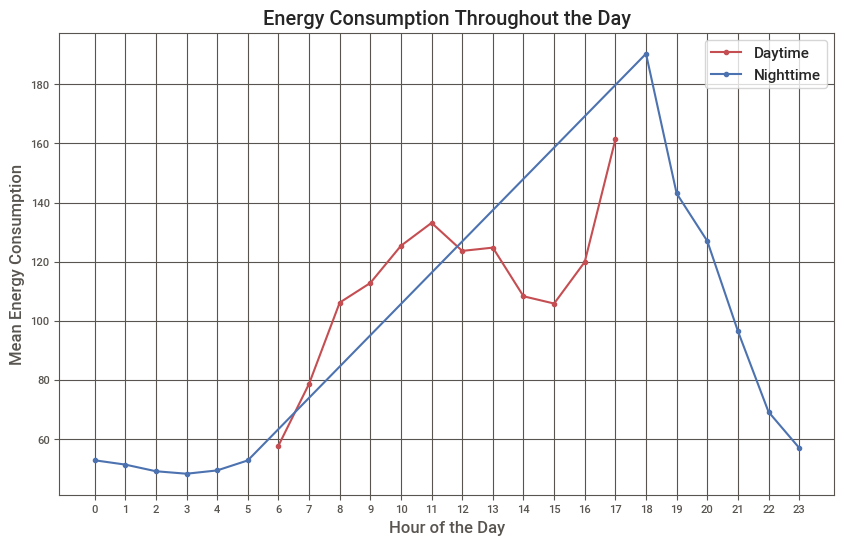

In [ ]:
# Chart - 8 visualization code
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns (e.g., 'hour' and 'Appliances')
# You can create a line chart to show energy consumption throughout the day
plt.figure(figsize=(10, 6))

# Group the data by hour and calculate the mean energy consumption for each hour
hourly_energy = data.groupby('hour')['Appliances'].mean()

# Split the data into daytime (6:00 AM to 6:00 PM) and nighttime (6:00 PM to 6:00 AM)
daytime_energy = hourly_energy[6:18]

nighttime_energy= hourly_energy[0:6].append(hourly_energy[18:24])

# Plot the daytime and nighttime energy consumption
plt.plot(daytime_energy.index, daytime_energy.values, label='Daytime', marker='o',color = 'r')
plt.plot(nighttime_energy.index, nighttime_energy.values, label='Nighttime', marker='o',color = 'b')

plt.title('Energy Consumption Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Energy Consumption')
plt.xticks(range(24))
plt.grid(True)
plt.legend()

plt.show()


Chart - 9

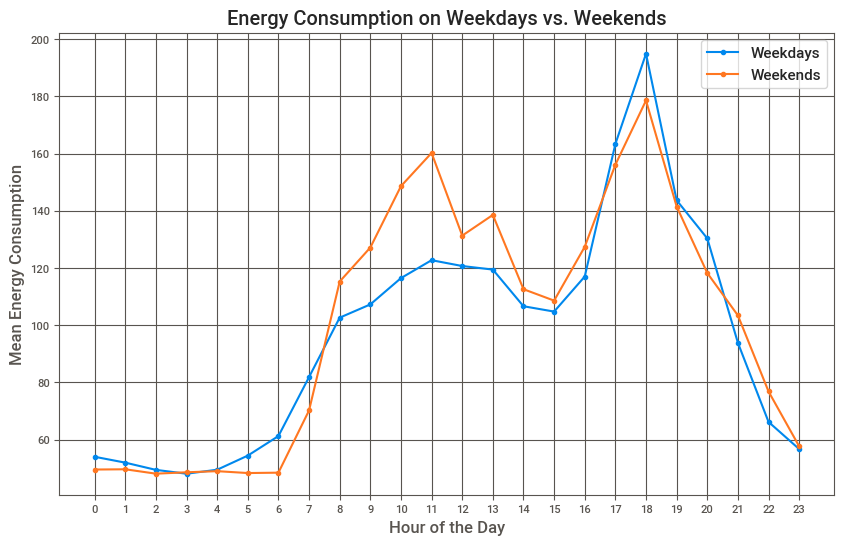

In [ ]:
# Chart - 9 visualization code
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with relevant columns (e.g., 'weekday' and 'Appliances')
# You can create a line chart to compare energy consumption on weekdays vs. weekends

plt.figure(figsize=(10, 6))

# Group the data by 'weekday' and calculate the mean energy consumption for weekdays and weekends
weekday_energy = data[data['weekday'] < 5].groupby('hour')['Appliances'].mean()
weekend_energy = data[data['weekday'] >= 5].groupby('hour')['Appliances'].mean()

# Plot energy consumption for weekdays and weekends
plt.plot(weekday_energy.index, weekday_energy.values, label='Weekdays', marker='o')
plt.plot(weekend_energy.index, weekend_energy.values, label='Weekends', marker='o')

plt.title('Energy Consumption on Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Energy Consumption')
plt.xticks(range(24))
plt.grid(True)
plt.legend()

plt.show()

Chart -10

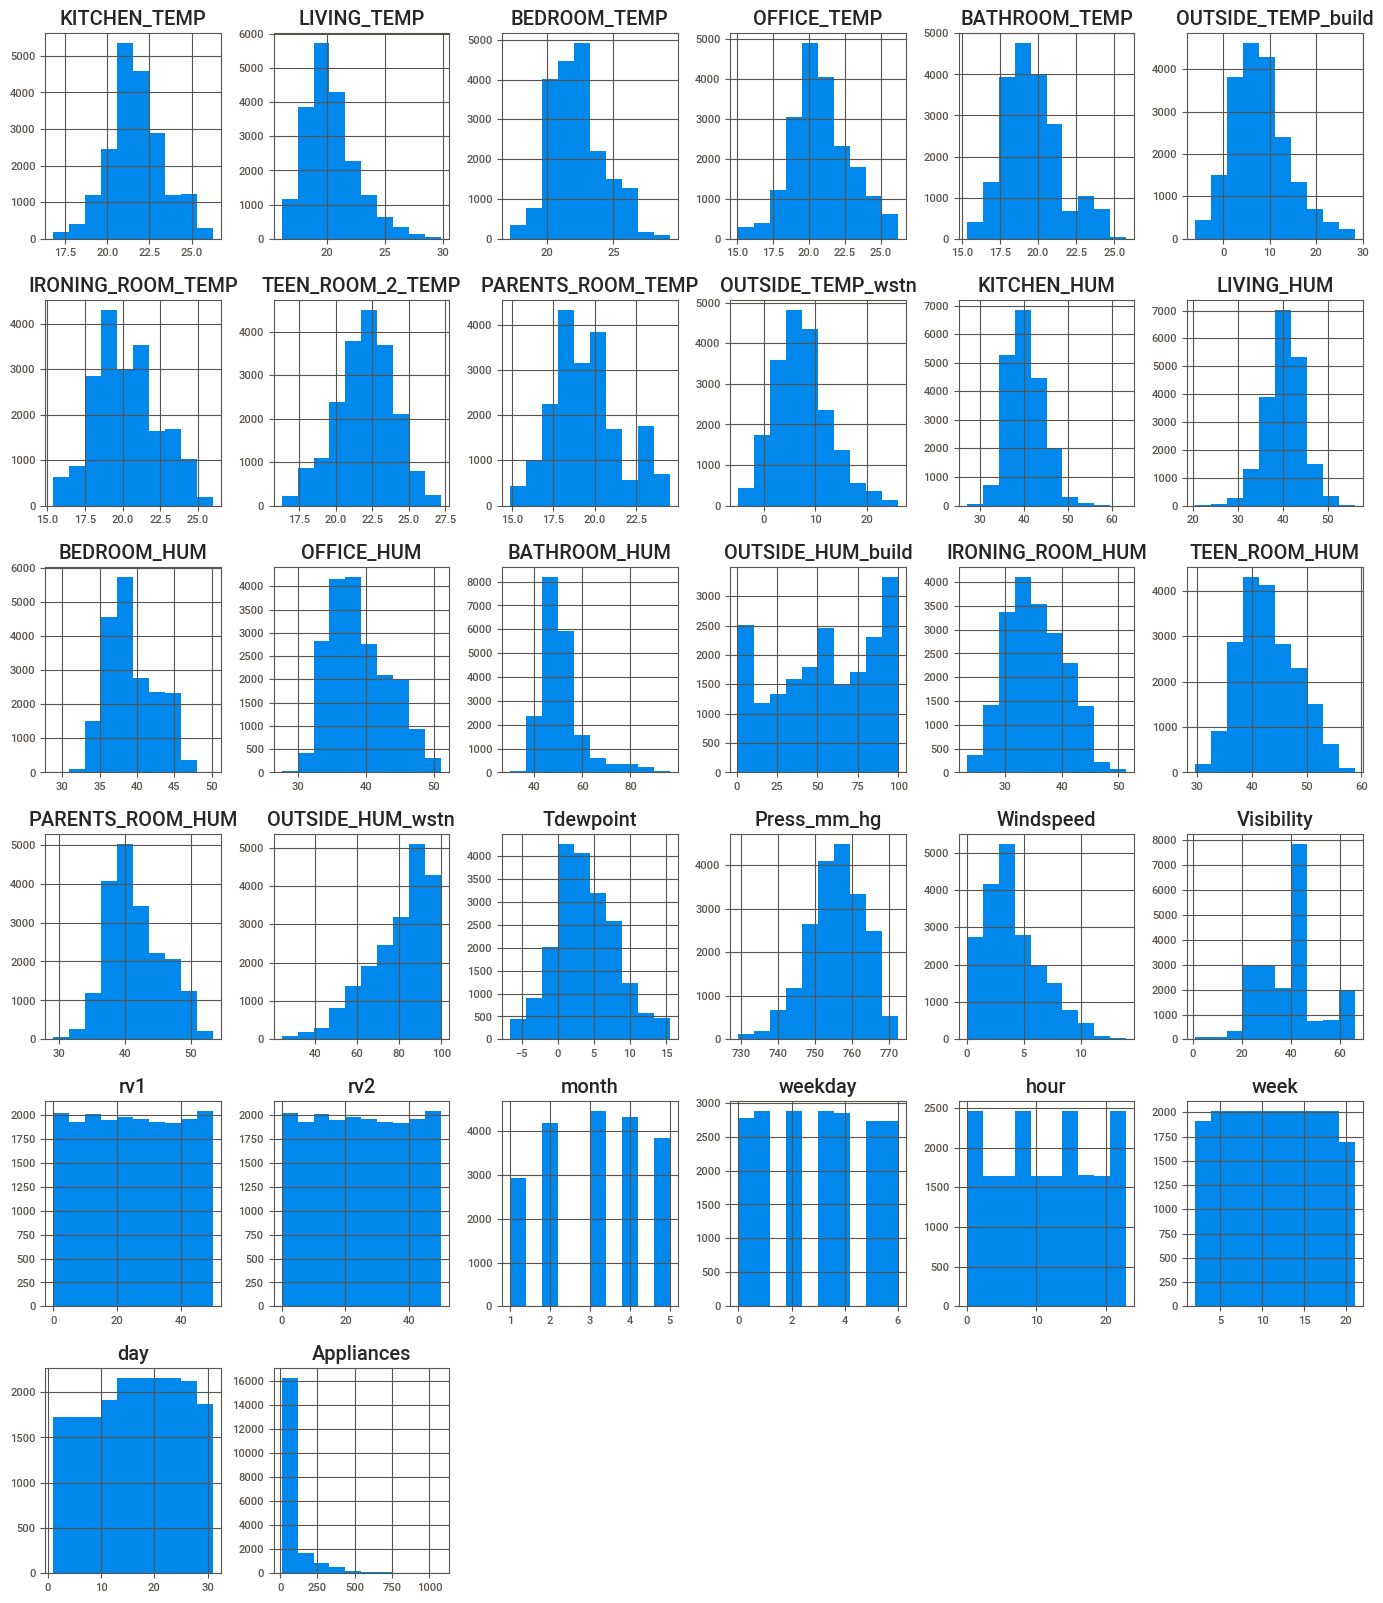

In [ ]:
# Visualizing distributions using Histograms:
data.hist(figsize=(17, 20), grid=True);

Chart -  Correlation Heatmap

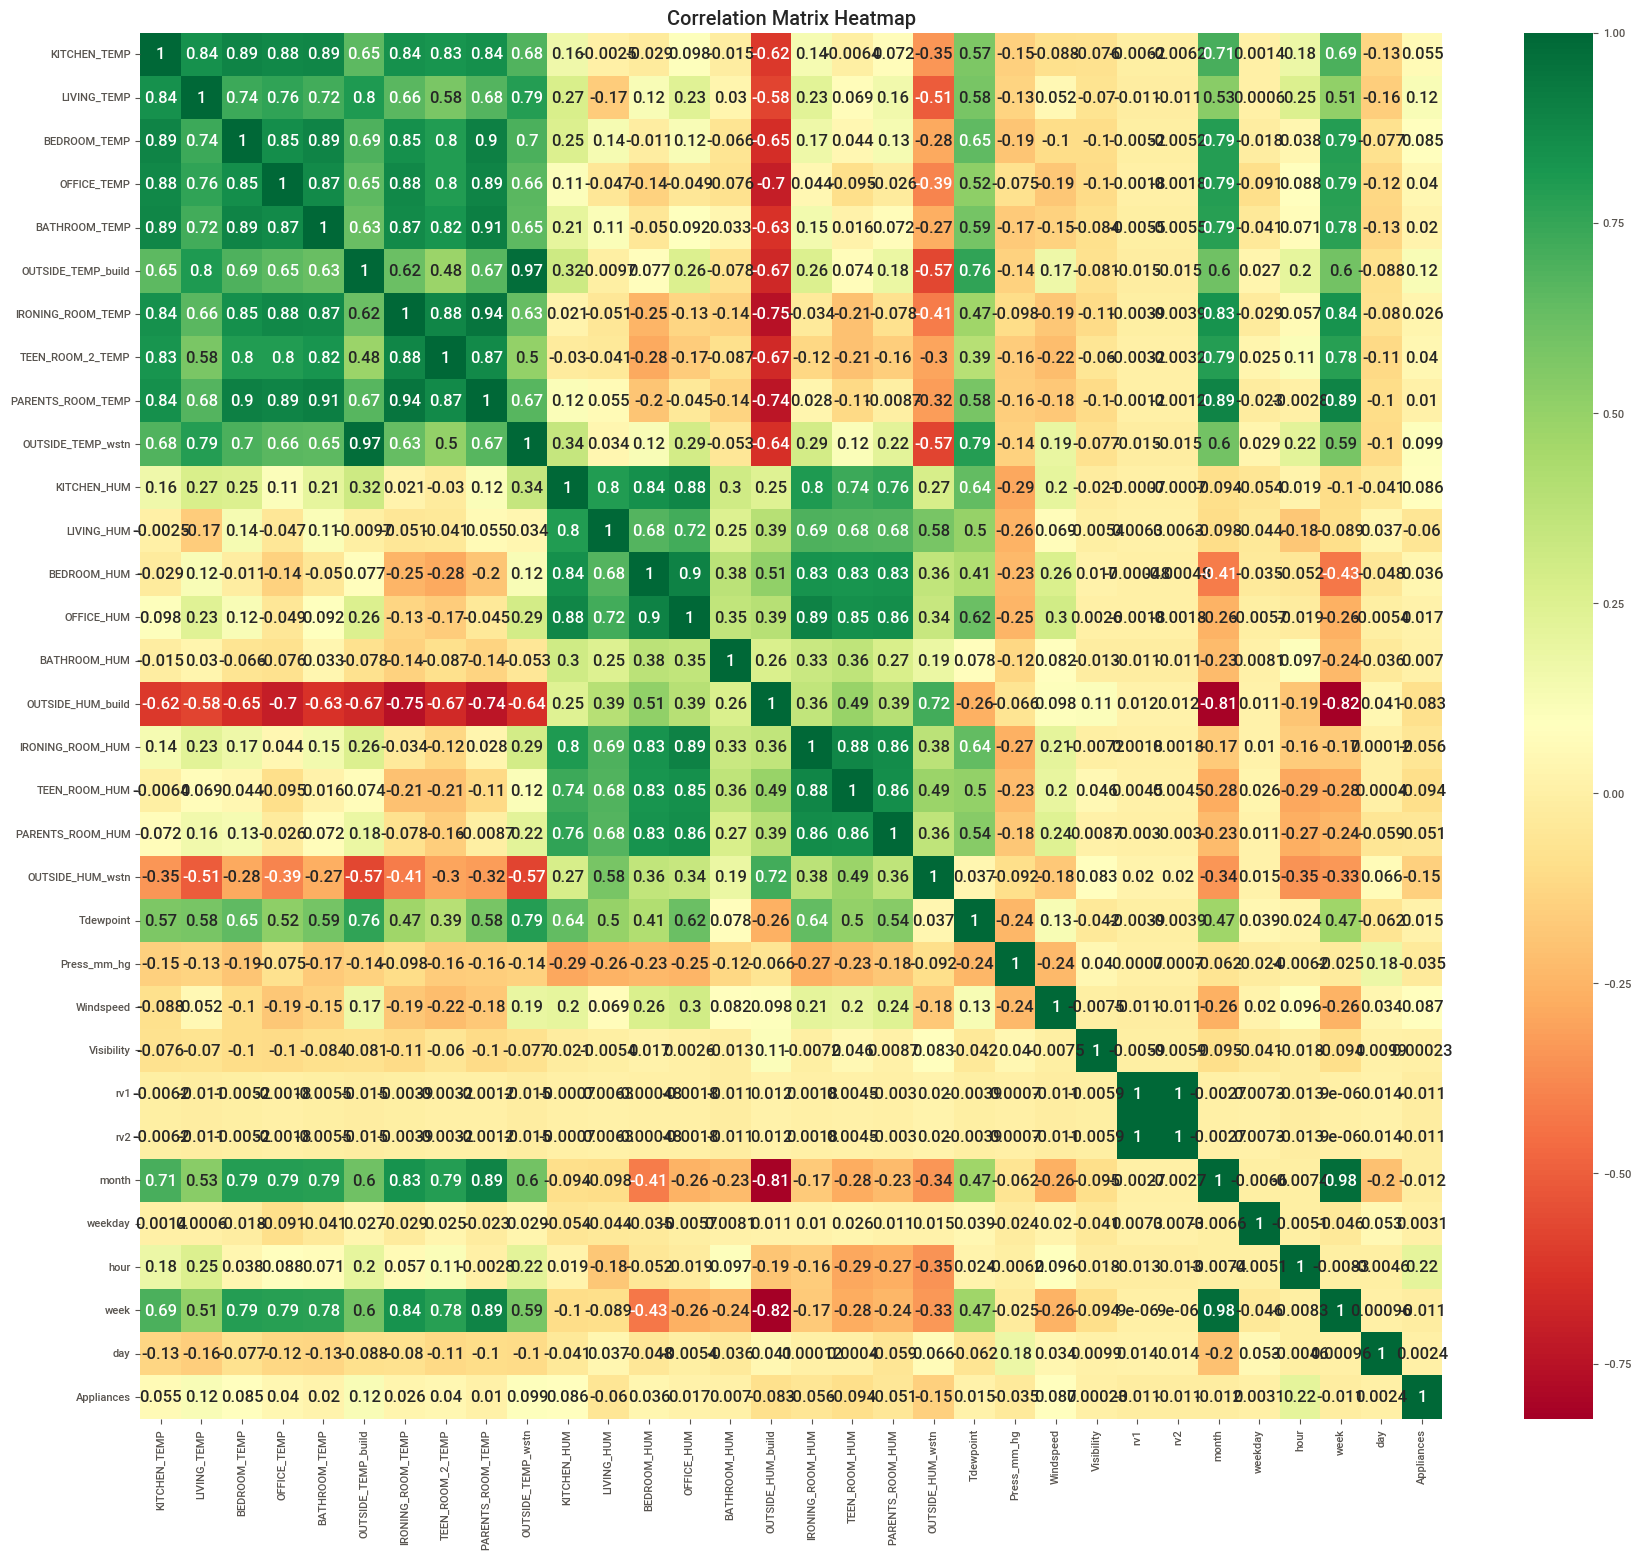

In [ ]:
# Correlation Heatmap visualization code
correlation_matrix = data.corr()
plt.figure(figsize=(21, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix Heatmap")
plt.show()

Chart - Pair Plot

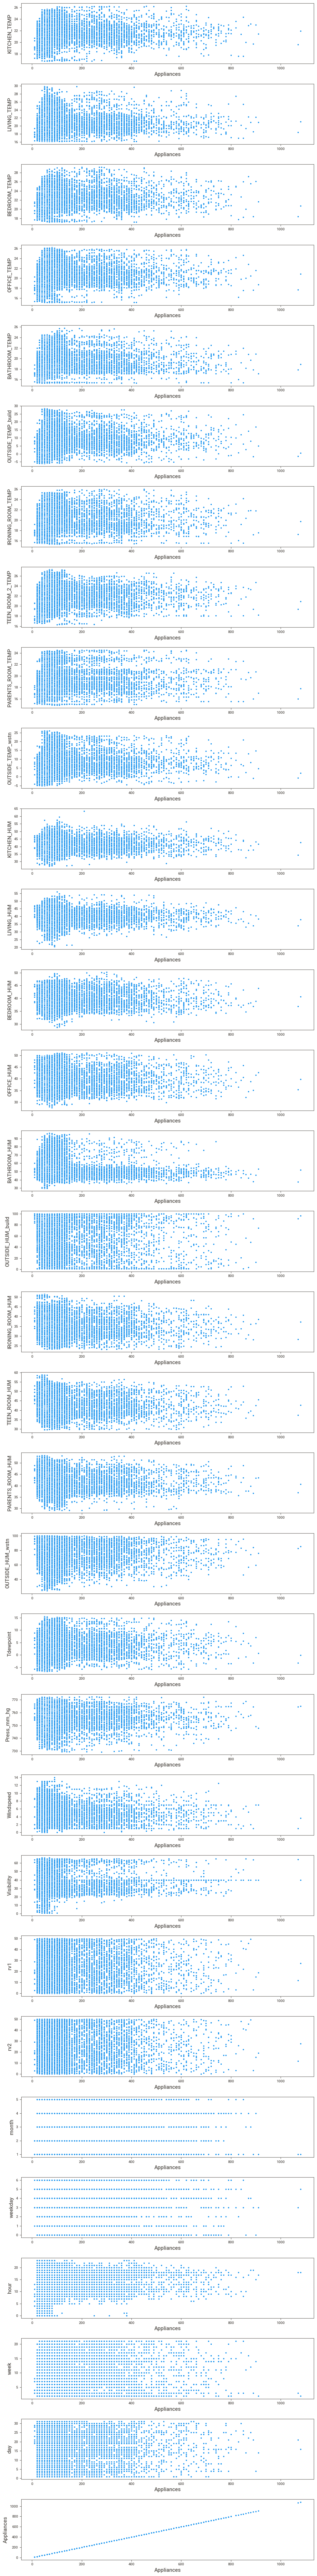

In [ ]:
# Get the list of column names in your dataset
columns = data.columns

# Determine the number of rows and columns for subplots
num_rows = len(columns)
num_cols = 1

# Create subplots with specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 80))

# Iterate over each column (excluding "Appliances") and create pair plot
for i, column in enumerate(columns):
    #if column != "Appliances":
        sns.scatterplot(data=data, x="Appliances", y=column, ax=axes[i])
        axes[i].set_xlabel("Appliances")
        axes[i].set_ylabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Hypothesis Testing
(Statistical)

In [ ]:
data.columns

Index(['KITCHEN_TEMP', 'LIVING_TEMP', 'BEDROOM_TEMP', 'OFFICE_TEMP',
       'BATHROOM_TEMP', 'OUTSIDE_TEMP_build', 'IRONING_ROOM_TEMP',
       'TEEN_ROOM_2_TEMP', 'PARENTS_ROOM_TEMP', 'OUTSIDE_TEMP_wstn',
       'KITCHEN_HUM', 'LIVING_HUM', 'BEDROOM_HUM', 'OFFICE_HUM',
       'BATHROOM_HUM', 'OUTSIDE_HUM_build', 'IRONING_ROOM_HUM',
       'TEEN_ROOM_HUM', 'PARENTS_ROOM_HUM', 'OUTSIDE_HUM_wstn', 'Tdewpoint',
       'Press_mm_hg', 'Windspeed', 'Visibility', 'rv1', 'rv2', 'month',
       'weekday', 'hour', 'week', 'day', 'Appliances'],
      dtype='object')

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import pearsonr

# Extract the two continuous variables you want to test
column_to_drop = ['Appliances']
independent_variables = data.drop(column_to_drop, axis = 1)
dependent_variable = data['Appliances']

# Step 2: Perform the Correlation Test (Pearson correlation)
correlation_coefficients, p_values = [], []
for feature in independent_variables.columns:
    correlation_coefficient, p_value = pearsonr(independent_variables[feature], dependent_variable)
    correlation_coefficients.append(correlation_coefficient)
    p_values.append(p_value)

# Step 3: Interpret the Results for each feature
alpha = 0.05  # Significance level (commonly set to 0.05)
for i, feature in enumerate(independent_variables.columns):
    print(f"Correlation Coefficient for '{feature}': {correlation_coefficients[i]:.4f}")
    print(f"P-value for '{feature}': {p_values[i]:.4f}")

    if p_values[i] < alpha:
        print("Result: The correlation is statistically significant (reject H0).\n")
    else:
        print("Result: There is no significant correlation (fail to reject H0).\n")


Correlation Coefficient for 'KITCHEN_TEMP': 0.0554
P-value for 'KITCHEN_TEMP': 0.0000
Result: The correlation is statistically significant (reject H0).

Correlation Coefficient for 'LIVING_TEMP': 0.1201
P-value for 'LIVING_TEMP': 0.0000
Result: The correlation is statistically significant (reject H0).

Correlation Coefficient for 'BEDROOM_TEMP': 0.0851
P-value for 'BEDROOM_TEMP': 0.0000
Result: The correlation is statistically significant (reject H0).

Correlation Coefficient for 'OFFICE_TEMP': 0.0403
P-value for 'OFFICE_TEMP': 0.0000
Result: The correlation is statistically significant (reject H0).

Correlation Coefficient for 'BATHROOM_TEMP': 0.0198
P-value for 'BATHROOM_TEMP': 0.0055
Result: The correlation is statistically significant (reject H0).

Correlation Coefficient for 'OUTSIDE_TEMP_build': 0.1176
P-value for 'OUTSIDE_TEMP_build': 0.0000
Result: The correlation is statistically significant (reject H0).

Correlation Coefficient for 'IRONING_ROOM_TEMP': 0.0258
P-value for 'IRO

Feature Engineering & Data Pre-processing
(Handling Missing Values)

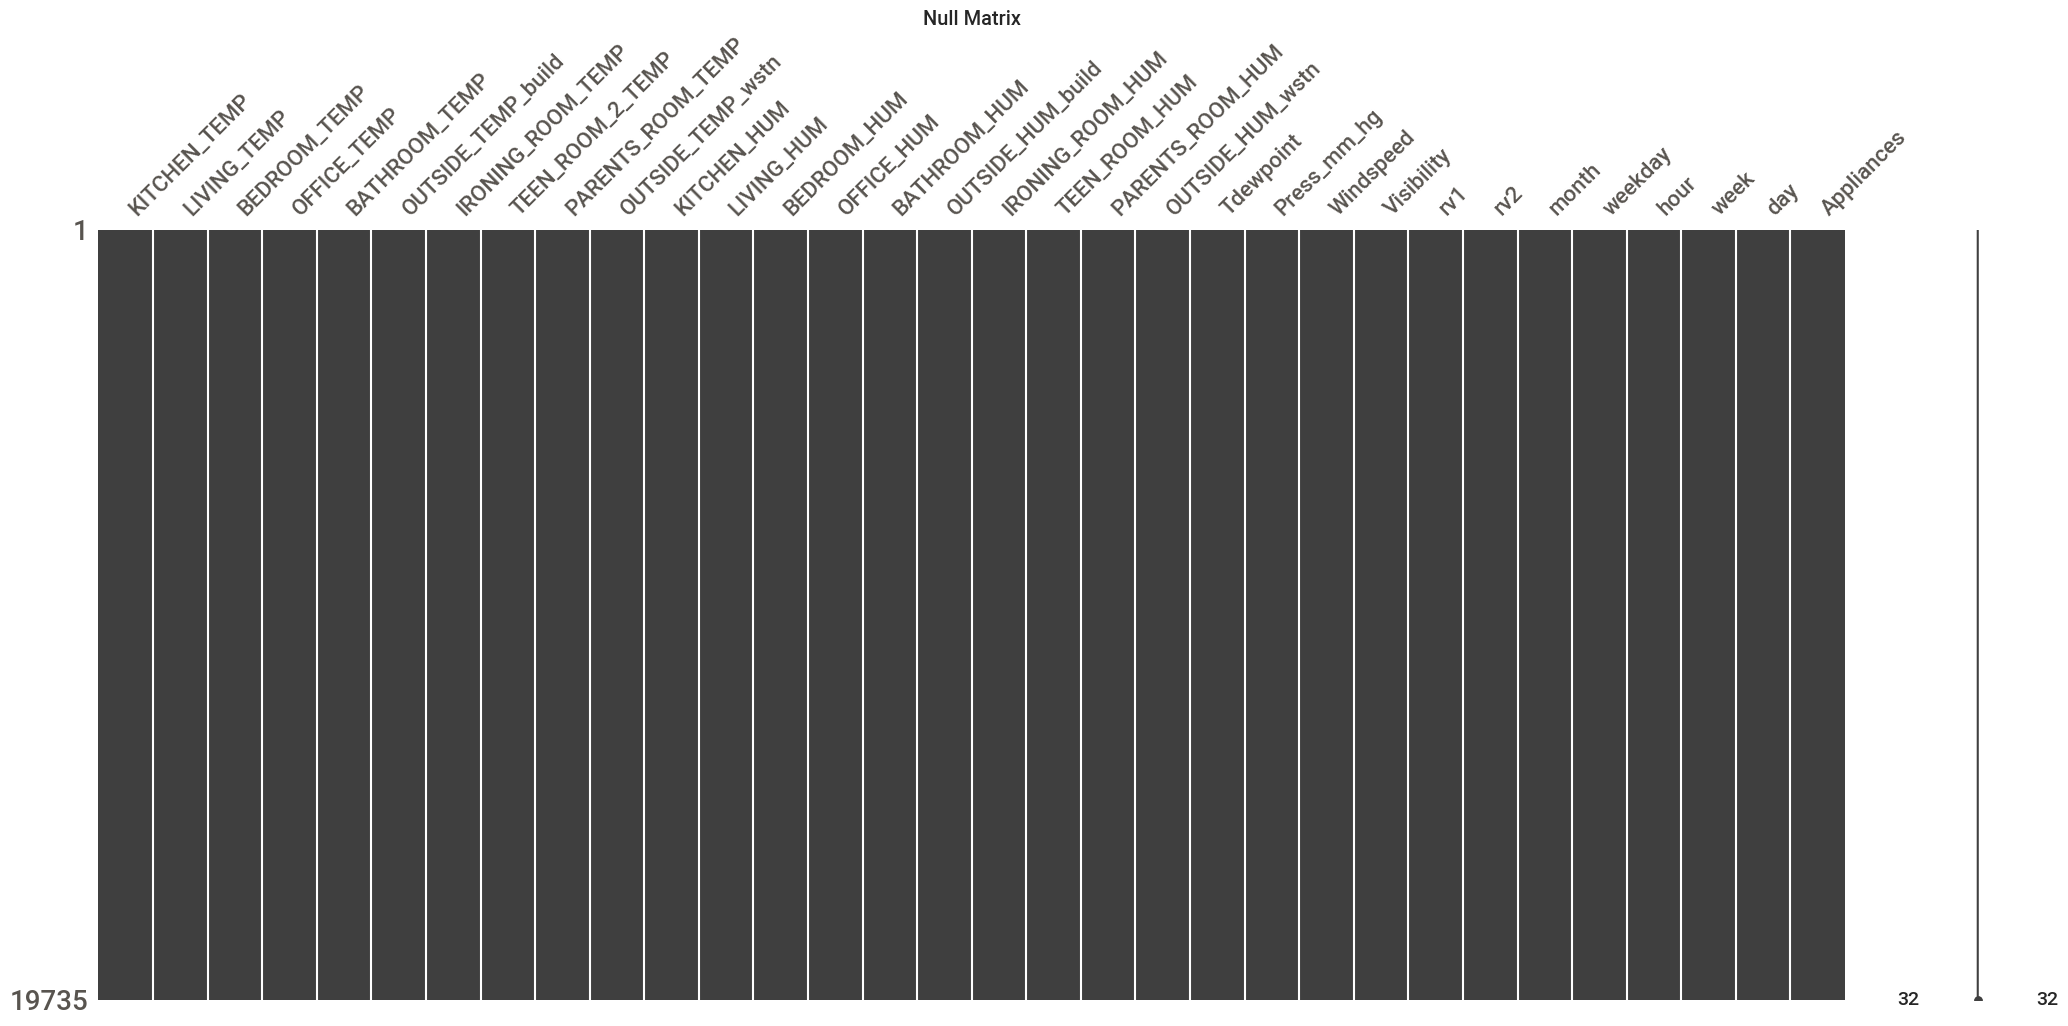

In [ ]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt

# Plotting the null matrix
msno.matrix(data)

# Customizing the plot
plt.title('Null Matrix')
plt.show()


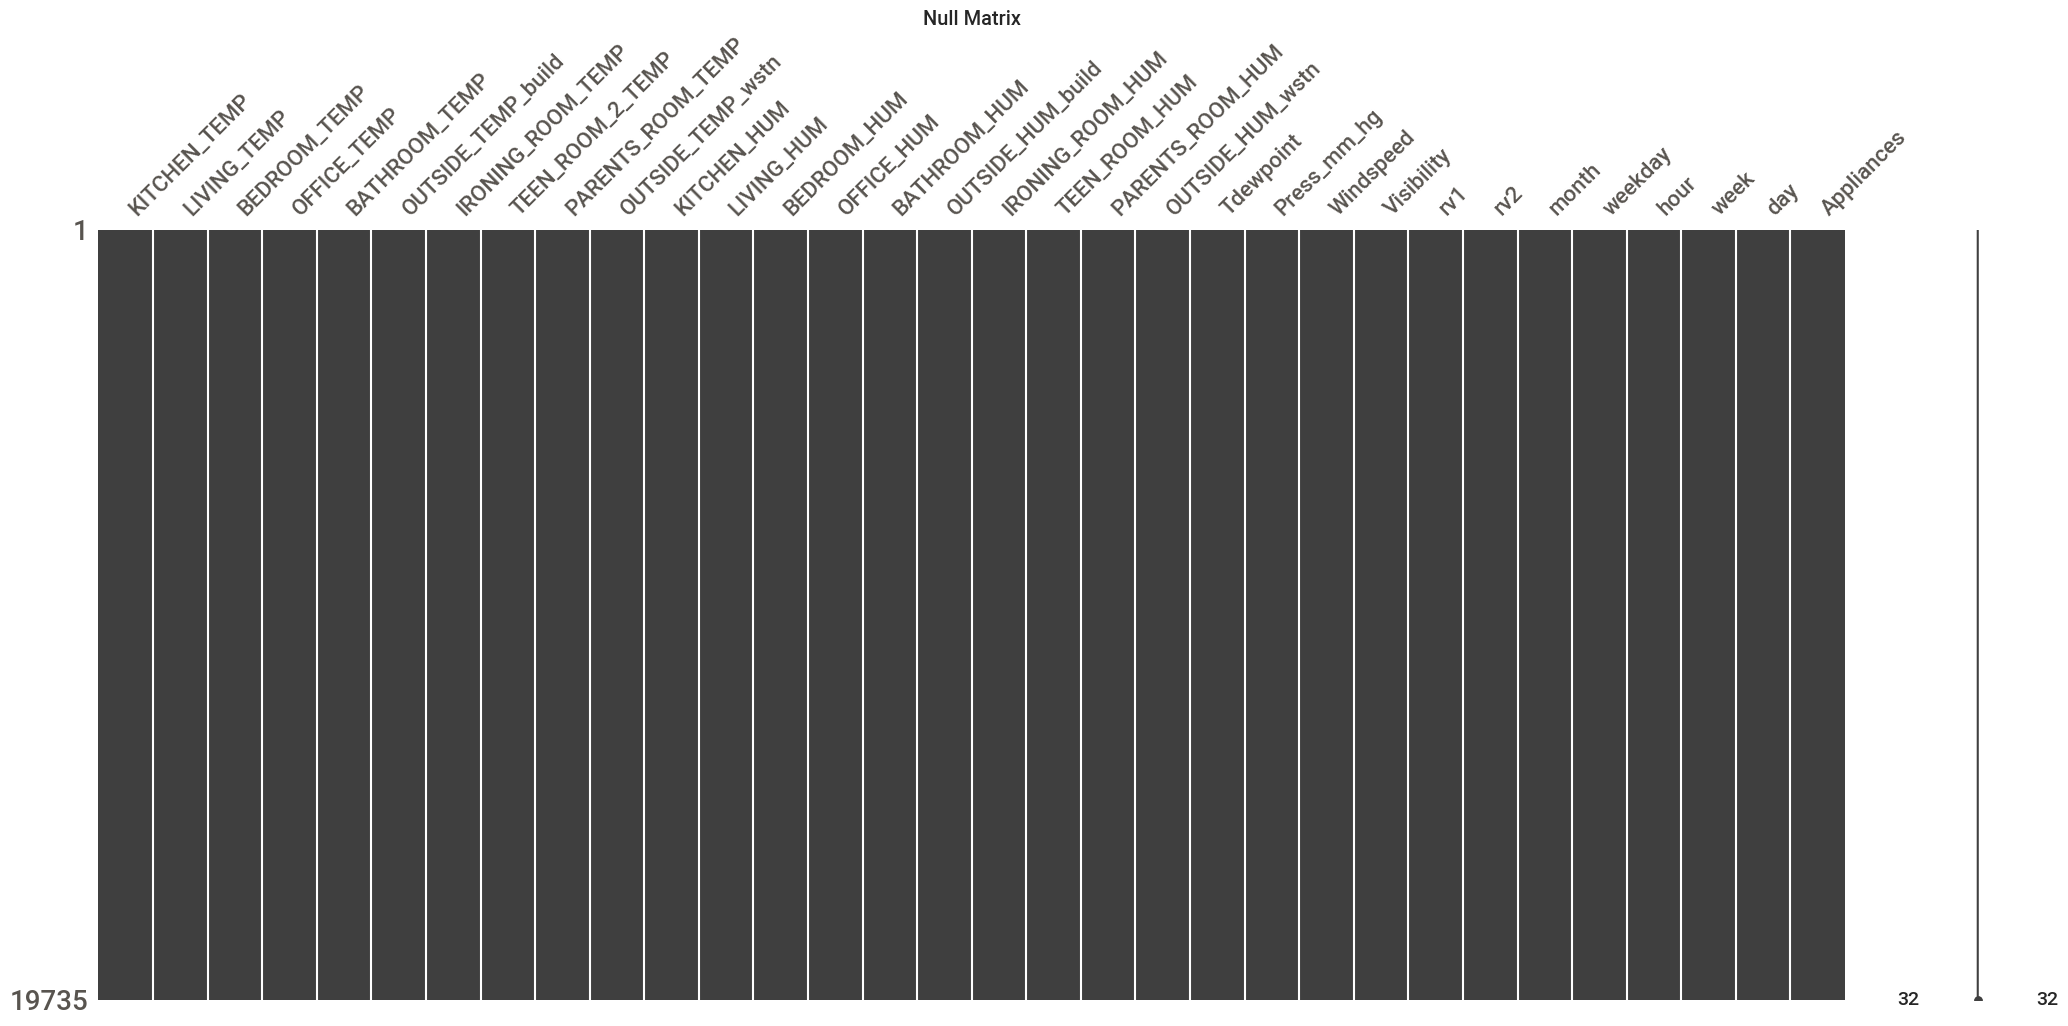

In [ ]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt

# Plotting the null matrix
msno.matrix(data)

# Customizing the plot
plt.title('Null Matrix')
plt.show()


No missing values imputation required

Handling Outliers

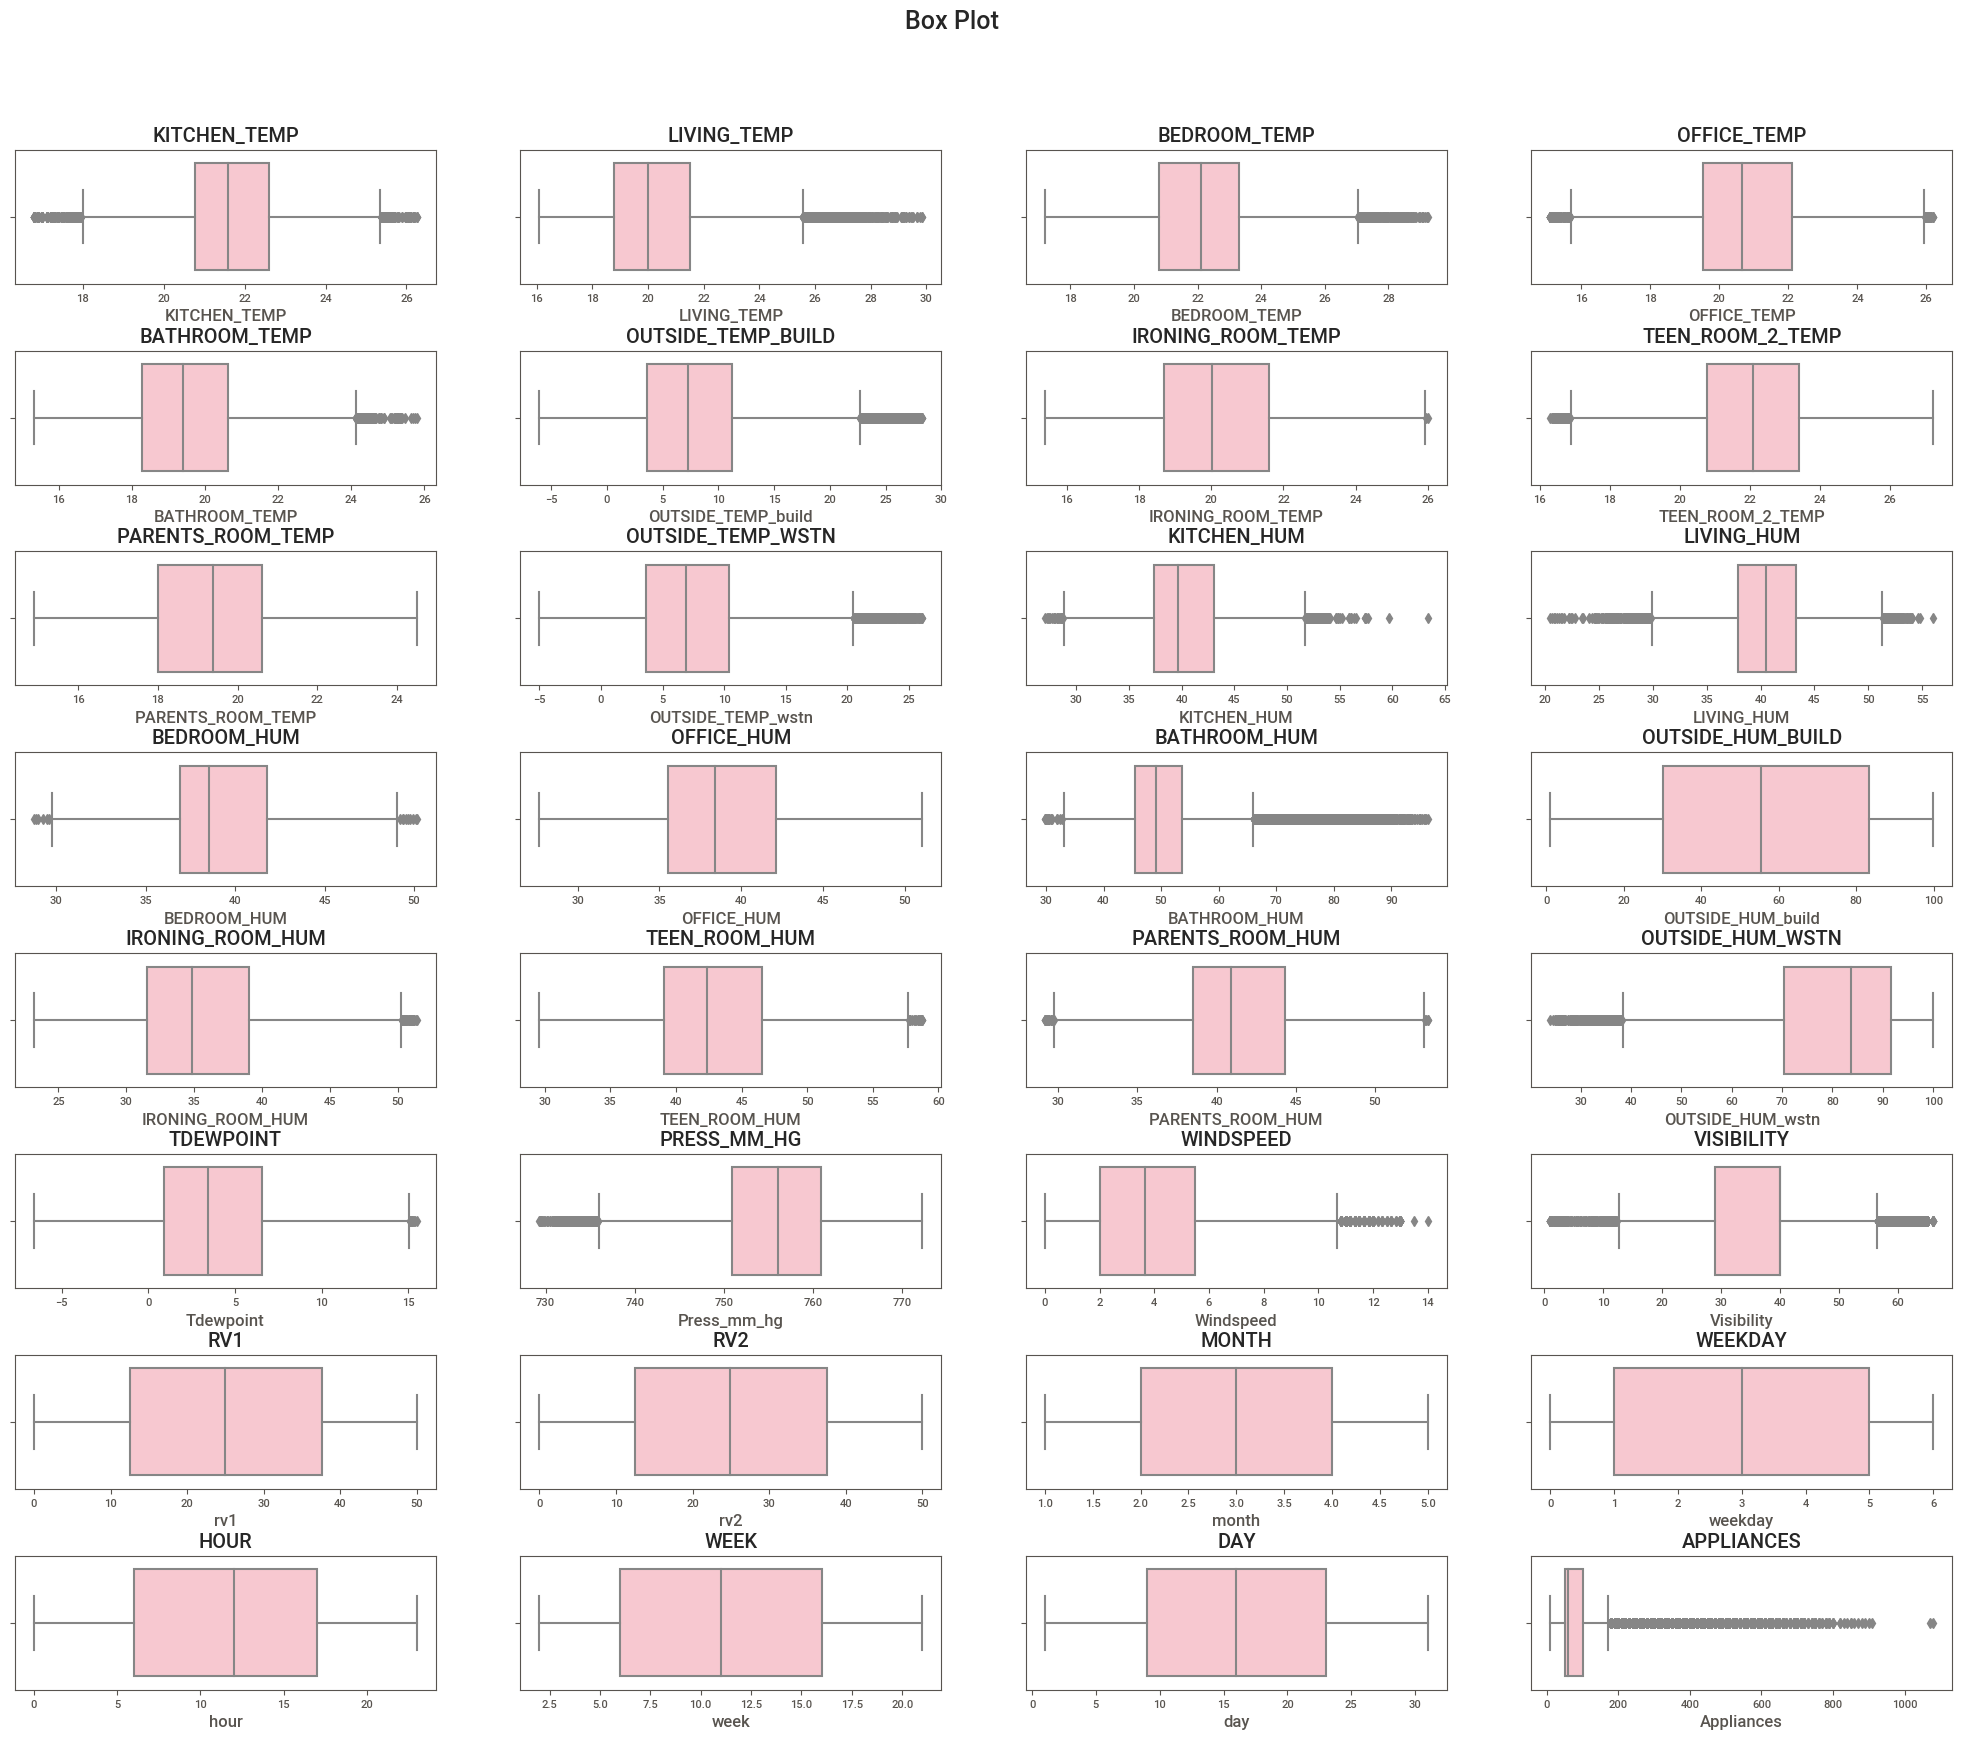

In [ ]:
# Handling Outliers & Outlier treatments
df= data.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())


In [ ]:
# Handling Outliers & Outlier treatments
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(data)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))



Number of outliers per column:
Visibility            2522
Appliances            2138
BATHROOM_HUM          1330
LIVING_TEMP            546
OUTSIDE_TEMP_build     515
KITCHEN_TEMP           515
OUTSIDE_TEMP_wstn      436
OUTSIDE_HUM_wstn       239
LIVING_HUM             235
Press_mm_hg            219
BEDROOM_TEMP           217
Windspeed              214
OFFICE_TEMP            186
BATHROOM_TEMP          179
KITCHEN_HUM            146
TEEN_ROOM_2_TEMP        71
IRONING_ROOM_HUM        42
PARENTS_ROOM_HUM        21
TEEN_ROOM_HUM           17
BEDROOM_HUM             15
Tdewpoint               10
IRONING_ROOM_TEMP        2
OUTSIDE_HUM_build        0
OFFICE_HUM               0
PARENTS_ROOM_TEMP        0
rv1                      0
rv2                      0
month                    0
weekday                  0
hour                     0
week                     0
day                      0
dtype: int64


In [ ]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    data[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

KITCHEN_TEMP 

Percentiles: 25th=20.760, 75th=22.600, IQR=1.840

lower = 18.0 and upper = 25.36 
 
Identified outliers: 515
KITCHEN_TEMP Outliers Removed

-------

LIVING_TEMP 

Percentiles: 25th=18.790, 75th=21.500, IQR=2.710

lower = 14.724999999999998 and upper = 25.565 
 
Identified outliers: 546
LIVING_TEMP Outliers Removed

-------

BEDROOM_TEMP 

Percentiles: 25th=20.790, 75th=23.290, IQR=2.500

lower = 17.04 and upper = 27.04 
 
Identified outliers: 217
BEDROOM_TEMP Outliers Removed

-------

OFFICE_TEMP 

Percentiles: 25th=19.530, 75th=22.100, IQR=2.570

lower = 15.675 and upper = 25.955000000000002 
 
Identified outliers: 186
OFFICE_TEMP Outliers Removed

-------

BATHROOM_TEMP 

Percentiles: 25th=18.277, 75th=20.620, IQR=2.342

lower = 14.764285714285725 and upper = 24.132857142857127 
 
Identified outliers: 179
BATHROOM_TEMP Outliers Removed

-------

OUTSIDE_TEMP_build 

Percentiles: 25th=3.627, 75th=11.256, IQR=7.629

lower = -7.817333333333325 and upper = 22.699999999999

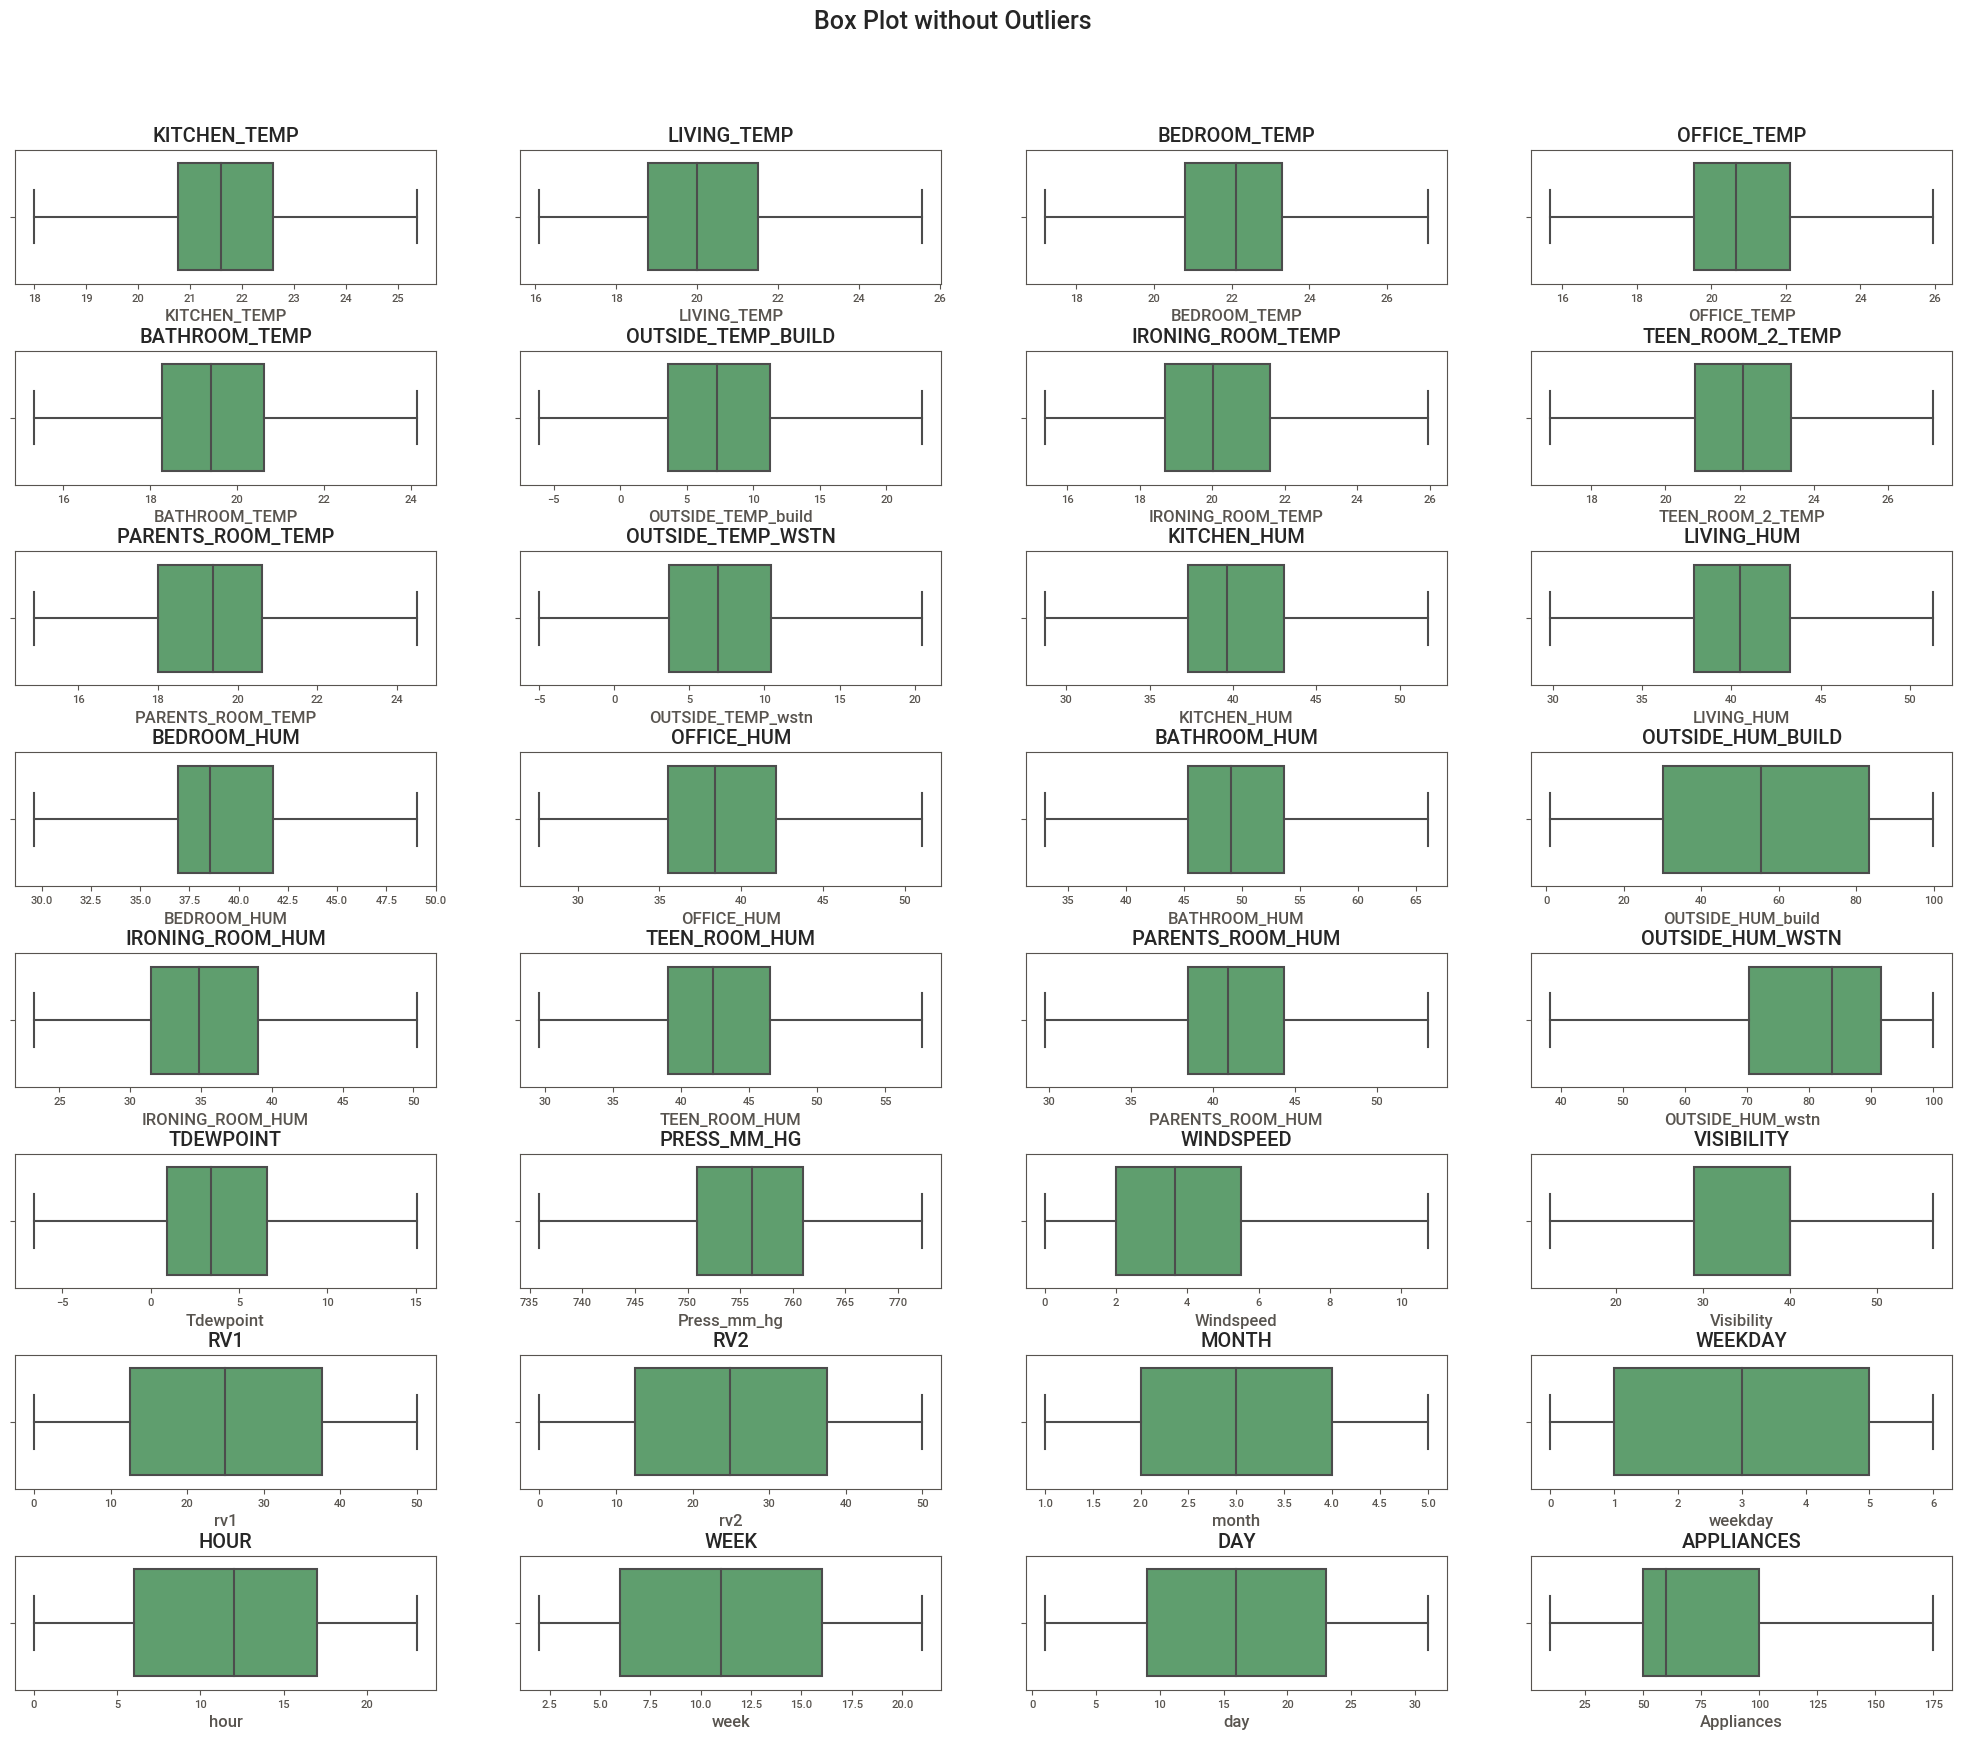

In [ ]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())


In [ ]:
#examining the shape after
data.shape

(19735, 32)

Feature Manipulation & Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# create new features
# create a column average building temperature based on all temperature
data['Average_building_Temperature']=data[['KITCHEN_TEMP','LIVING_TEMP','BEDROOM_TEMP','OFFICE_TEMP','BATHROOM_TEMP','IRONING_ROOM_TEMP','TEEN_ROOM_2_TEMP','PARENTS_ROOM_TEMP']].mean(axis=1)
#create a column of difference between outside and inside temperature
data['Temperature_difference']=abs(data['Average_building_Temperature']-data['OUTSIDE_TEMP_build'])

#create a column average building humidity
data['Average_building_humidity']=data[['KITCHEN_HUM','LIVING_HUM','BEDROOM_HUM', 'OFFICE_HUM','BATHROOM_HUM','IRONING_ROOM_HUM','TEEN_ROOM_HUM','PARENTS_ROOM_HUM']].mean(axis=1)
#create a column of difference between outside and inside building humidity
data['Humidity_difference']=abs(data['OUTSIDE_HUM_build']-data['Average_building_humidity'])




In [ ]:
# drop random variables as it does not look like that much important while predicting the output
columns_to_drop = ['rv1','rv2']
data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
data.shape

(19735, 34)

Finding skewed and symmetrical data

In [ ]:
#examining the skewness in the dataset to check the distribution
skewness = data.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = data[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = data[skewed_features]
print(skewed_features)


FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['KITCHEN_TEMP', 'BEDROOM_TEMP', 'OFFICE_TEMP', 'OUTSIDE_TEMP_build',
       'IRONING_ROOM_TEMP', 'TEEN_ROOM_2_TEMP', 'PARENTS_ROOM_TEMP',
       'OUTSIDE_TEMP_wstn', 'KITCHEN_HUM', 'LIVING_HUM', 'BEDROOM_HUM',
       'OFFICE_HUM', 'OUTSIDE_HUM_build', 'IRONING_ROOM_HUM', 'TEEN_ROOM_HUM',
       'PARENTS_ROOM_HUM', 'Tdewpoint', 'Press_mm_hg', 'Visibility', 'month',
       'weekday', 'hour', 'week', 'day', 'Average_building_Temperature',
       'Temperature_difference', 'Average_building_humidity',
       'Humidity_difference'],
      dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['LIVING_TEMP', 'BATHROOM_TEMP', 'BATHROOM_HUM', 'OUTSIDE_HUM_wstn',
       'Windspeed', 'Appliances'],
      dtype='object')


Data Transformation

In [ ]:
#examining the skewed data
skewed_data

LIVING_TEMP  BATHROOM_TEMP  BATHROOM_HUM  \
date                                                            
2016-01-11 17:00:00    19.200000      17.166667     55.200000   
2016-01-11 17:10:00    19.200000      17.166667     55.200000   
2016-01-11 17:20:00    19.200000      17.166667     55.090000   
2016-01-11 17:30:00    19.200000      17.166667     55.090000   
2016-01-11 17:40:00    19.200000      17.200000     55.090000   
...                          ...            ...           ...   
2016-05-27 17:20:00    25.565000      23.200000     52.400000   
2016-05-27 17:30:00    25.565000      23.230000     52.326667   
2016-05-27 17:40:00    25.565000      23.230000     52.266667   
2016-05-27 17:50:00    25.414000      23.200000     52.200000   
2016-05-27 18:00:00    25.264286      23.200000     52.200000   

                     OUTSIDE_HUM_wstn  Windspeed  Appliances  
date                                                          
2016-01-11 17:00:00         92.000000   7.000000        60.0  
2016-01-11 17:10:00         92.000000   6.666667        60.0  
2016-01-11 17:20:00         92.000000   6.333333        50.0  
2016-01-11 17:30:00         92.000000   6.000000        50.0  
2016-01-11 17:40:00         92.000000   5.666667        60.0  
...                               ...        ...         ...  
2016-05-27 17:20:00         55.666667   3.333333       100.0  
2016-05-27 17:30:00         56.000000   3.500000        90.0  
2016-05-27 17:40:00         56.333333   3.666667       175.0  
2016-05-27 17:50:00         56.666667   3.833333       175.0  
2016-05-27 18:00:00         57.000000   4.000000       175.0  

[19735 rows x 6 columns]

In [ ]:
#import the liabrary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data using the PowerTransformer
power_transformed = pd.DataFrame(power_transformer.fit_transform(skewed_data))
power_transformed.columns = skewed_data.columns


In [ ]:
#examining the power transformed data
power_transformed

LIVING_TEMP  BATHROOM_TEMP  BATHROOM_HUM  OUTSIDE_HUM_wstn  Windspeed  \
0        -0.454658      -1.444557      0.822595          0.878538   1.196112   
1        -0.454658      -1.444557      0.822595          0.878538   1.105732   
2        -0.454658      -1.444557      0.809032          0.878538   1.011588   
3        -0.454658      -1.444557      0.809032          0.878538   0.913340   
4        -0.454658      -1.420253      0.809032          0.878538   0.810601   
...            ...            ...           ...               ...        ...   
19730     2.061339       1.773572      0.458243         -1.534519  -0.083185   
19731     2.061339       1.785203      0.448136         -1.521899  -0.005830   
19732     2.061339       1.785203      0.439844         -1.509132   0.068883   
19733     2.019912       1.773572      0.430606         -1.496217   0.141133   
19734     1.978206       1.773572      0.430606         -1.483154   0.211082   

       Appliances  
0       -0.240595  
1       -0.240595  
2       -0.620965  
3       -0.620965  
4       -0.240595  
...           ...  
19730    0.758242  
19731    0.560135  
19732    1.744721  
19733    1.744721  
19734    1.744721  

[19735 rows x 6 columns]

In [ ]:
# Reset the index to the default integer index
symmetrical_data.reset_index(drop=True, inplace=True)

In [ ]:
#examining the symmetrical data
symmetrical_data

KITCHEN_TEMP  BEDROOM_TEMP  OFFICE_TEMP  OUTSIDE_TEMP_build  \
0             19.89     19.790000    19.000000            7.026667   
1             19.89     19.790000    19.000000            6.833333   
2             19.89     19.790000    18.926667            6.560000   
3             19.89     19.790000    18.890000            6.433333   
4             19.89     19.790000    18.890000            6.366667   
...             ...           ...          ...                 ...   
19730         25.36     27.040000    24.700000           22.700000   
19731         25.36     27.040000    24.700000           22.700000   
19732         25.36     27.040000    24.700000           22.700000   
19733         25.36     26.890000    24.700000           22.433333   
19734         25.36     26.823333    24.700000           21.026667   

       IRONING_ROOM_TEMP  TEEN_ROOM_2_TEMP  PARENTS_ROOM_TEMP  \
0              17.200000           18.2000          17.033333   
1              17.200000           18.2000          17.066667   
2              17.200000           18.2000          17.000000   
3              17.133333           18.1000          17.000000   
4              17.200000           18.1000          17.000000   
...                  ...               ...                ...   
19730          24.500000           24.7000          23.200000   
19731          24.557143           24.7000          23.200000   
19732          24.540000           24.7000          23.200000   
19733          24.500000           24.6625          23.200000   
19734          24.500000           24.7360          23.200000   

       OUTSIDE_TEMP_wstn  KITCHEN_HUM  LIVING_HUM  BEDROOM_HUM  OFFICE_HUM  \
0               6.600000    47.596667   44.790000    44.730000   45.566667   
1               6.483333    46.693333   44.722500    44.790000   45.992500   
2               6.366667    46.300000   44.626667    44.933333   45.890000   
3               6.250000    46.066667   44.590000    45.000000   45.723333   
4               6.133333    46.333333   44.530000    45.000000   45.530000   
...                  ...          ...         ...          ...         ...   
19730          20.520833    46.560000   42.025714    41.163333   45.590000   
19731          20.520833    46.500000   42.080000    41.223333   45.590000   
19732          20.520833    46.596667   42.768571    41.690000   45.730000   
19733          20.520833    46.990000   43.036000    41.290000   45.790000   
19734          20.520833    46.600000   42.971429    41.156667   45.963333   

       OUTSIDE_HUM_build  IRONING_ROOM_HUM  TEEN_ROOM_HUM  PARENTS_ROOM_HUM  \
0              84.256667         41.626667      48.900000           45.5300   
1              84.063333         41.560000      48.863333           45.5600   
2              83.156667         41.433333      48.730000           45.5000   
3              83.423333         41.290000      48.590000           45.4000   
4              84.893333         41.230000      48.590000           45.4000   
...                  ...               ...            ...               ...   
19730           1.000000         44.500000      50.074000           46.7900   
19731           1.000000         44.414286      49.790000           46.7900   
19732           1.000000         44.400000      49.660000           46.7900   
19733           1.000000         44.295714      49.518750           46.8175   
19734           1.000000         44.054000      49.736000           46.8450   

       Tdewpoint  Press_mm_hg  Visibility  month  weekday  hour  week  day  \
0       5.300000   735.933333   56.500000      1        0    17     2   11   
1       5.200000   735.933333   56.500000      1        0    17     2   11   
2       5.100000   735.933333   55.333333      1        0    17     2   11   
3       5.000000   735.933333   51.500000      1        0    17     2   11   
4       4.900000   735.933333   47.666667      1        0    17     2   11   
...          ...          ...  

In [ ]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, power_transformed], axis=1)

In [ ]:
#examining the transformed data
tranformed_data

KITCHEN_TEMP  BEDROOM_TEMP  OFFICE_TEMP  OUTSIDE_TEMP_build  \
0             19.89     19.790000    19.000000            7.026667   
1             19.89     19.790000    19.000000            6.833333   
2             19.89     19.790000    18.926667            6.560000   
3             19.89     19.790000    18.890000            6.433333   
4             19.89     19.790000    18.890000            6.366667   
...             ...           ...          ...                 ...   
19730         25.36     27.040000    24.700000           22.700000   
19731         25.36     27.040000    24.700000           22.700000   
19732         25.36     27.040000    24.700000           22.700000   
19733         25.36     26.890000    24.700000           22.433333   
19734         25.36     26.823333    24.700000           21.026667   

       IRONING_ROOM_TEMP  TEEN_ROOM_2_TEMP  PARENTS_ROOM_TEMP  \
0              17.200000           18.2000          17.033333   
1              17.200000           18.2000          17.066667   
2              17.200000           18.2000          17.000000   
3              17.133333           18.1000          17.000000   
4              17.200000           18.1000          17.000000   
...                  ...               ...                ...   
19730          24.500000           24.7000          23.200000   
19731          24.557143           24.7000          23.200000   
19732          24.540000           24.7000          23.200000   
19733          24.500000           24.6625          23.200000   
19734          24.500000           24.7360          23.200000   

       OUTSIDE_TEMP_wstn  KITCHEN_HUM  LIVING_HUM  BEDROOM_HUM  OFFICE_HUM  \
0               6.600000    47.596667   44.790000    44.730000   45.566667   
1               6.483333    46.693333   44.722500    44.790000   45.992500   
2               6.366667    46.300000   44.626667    44.933333   45.890000   
3               6.250000    46.066667   44.590000    45.000000   45.723333   
4               6.133333    46.333333   44.530000    45.000000   45.530000   
...                  ...          ...         ...          ...         ...   
19730          20.520833    46.560000   42.025714    41.163333   45.590000   
19731          20.520833    46.500000   42.080000    41.223333   45.590000   
19732          20.520833    46.596667   42.768571    41.690000   45.730000   
19733          20.520833    46.990000   43.036000    41.290000   45.790000   
19734          20.520833    46.600000   42.971429    41.156667   45.963333   

       OUTSIDE_HUM_build  IRONING_ROOM_HUM  TEEN_ROOM_HUM  PARENTS_ROOM_HUM  \
0              84.256667         41.626667      48.900000           45.5300   
1              84.063333         41.560000      48.863333           45.5600   
2              83.156667         41.433333      48.730000           45.5000   
3              83.423333         41.290000      48.590000           45.4000   
4              84.893333         41.230000      48.590000           45.4000   
...                  ...               ...            ...               ...   
19730           1.000000         44.500000      50.074000           46.7900   
19731           1.000000         44.414286      49.790000           46.7900   
19732           1.000000         44.400000      49.660000           46.7900   
19733           1.000000         44.295714      49.518750           46.8175   
19734           1.000000         44.054000      49.736000           46.8450   

       Tdewpoint  Press_mm_hg  Visibility  month  weekday  hour  week  day  \
0       5.300000   735.933333   56.500000      1        0    17     2   11   
1       5.200000   735.933333   56.500000      1        0    17     2   11   
2       5.100000   735.933333   55.333333      1        0    17     2   11   
3       5.000000   735.933333   51.500000      1        0    17     2   11   
4       4.900000   735.933333   47.666667      1        0    17     2   11   
...          ...          ...  

Scaling the DATA set

In [ ]:
#importing the desired liabrary
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(tranformed_data))
scaled_data.columns = tranformed_data.columns
scaled_data

KITCHEN_TEMP  BEDROOM_TEMP  OFFICE_TEMP  OUTSIDE_TEMP_build  \
0         -1.139072     -1.245155    -0.912635           -0.139440   
1         -1.139072     -1.245155    -0.912635           -0.172007   
2         -1.139072     -1.245155    -0.948663           -0.218049   
3         -1.139072     -1.245155    -0.966677           -0.239386   
4         -1.139072     -1.245155    -0.966677           -0.250616   
...             ...           ...          ...                 ...   
19730      2.322581      2.411061     1.887732            2.500708   
19731      2.322581      2.411061     1.887732            2.500708   
19732      2.322581      2.411061     1.887732            2.500708   
19733      2.322581      2.335416     1.887732            2.455789   
19734      2.322581      2.301795     1.887732            2.218838   

       IRONING_ROOM_TEMP  TEEN_ROOM_2_TEMP  PARENTS_ROOM_TEMP  \
0              -1.453651         -1.961010          -1.217324   
1              -1.453651         -1.961010          -1.200778   
2              -1.453651         -1.961010          -1.233869   
3              -1.485247         -2.012209          -1.233869   
4              -1.453651         -2.012209          -1.233869   
...                  ...               ...                ...   
19730           2.006178          1.366913           1.843571   
19731           2.033260          1.366913           1.843571   
19732           2.025136          1.366913           1.843571   
19733           2.006178          1.347713           1.843571   
19734           2.006178          1.385345           1.843571   

       OUTSIDE_TEMP_wstn  KITCHEN_HUM  LIVING_HUM  BEDROOM_HUM  OFFICE_HUM  \
0              -0.147777     1.863478    1.092582     1.686863    1.506438   
1              -0.170232     1.634348    1.075633     1.705307    1.604528   
2              -0.192686     1.534580    1.051570     1.749367    1.580918   
3              -0.215141     1.475395    1.042363     1.769859    1.542526   
4              -0.237595     1.543034    1.027297     1.769859    1.497991   
...                  ...          ...         ...          ...         ...   
19730           2.531521     1.600528    0.398479     0.590497    1.511812   
19731           2.531521     1.585309    0.412110     0.608941    1.511812   
19732           2.531521     1.609829    0.585008     0.752391    1.544061   
19733           2.531521     1.709597    0.652158     0.629434    1.557883   
19734           2.531521     1.610674    0.635945     0.588448    1.597810   

       OUTSIDE_HUM_build  IRONING_ROOM_HUM  TEEN_ROOM_HUM  PARENTS_ROOM_HUM  \
0               0.951798          1.220911       1.142031          0.958298   
1               0.945592          1.207866       1.135010          0.965526   
2               0.916484          1.183081       1.109480          0.951070   
3               0.925045          1.155035       1.082673          0.926976   
4               0.972238          1.143295       1.082673          0.926976   
...                  ...               ...            ...               ...   
19730          -1.721052          1.783138       1.366822          1.261883   
19731          -1.721052          1.766366       1.312443          1.261883   
19732          -1.721052          1.763571       1.287552          1.261883   
19733          -1.721052          1.743165       1.260506          1.268509   
19734          -1.721052          1.695869       1.302104          1.275134   

       Tdewpoint  Press_mm_hg  Visibility     month   weekday      hour  \
0       0.367016    -2.684267    1.799947 -1.569369 -1.499445  0.794304   
1       0.343175    -2.684267    1.799947 -1.569369 -1.499445  0.794304   
2       0.319333    -2.684267    1.687977 -1.569369 -1.499445  0.794304   
3       0.295491    -2.684267    1.320076 -1.569369 -1.499445  0.794304   
4       0.271649    -2.684267    0.952175 -1.569369 -1.499445  0.794304   
...          ...          ...         ...       .

Dimesionality Reduction

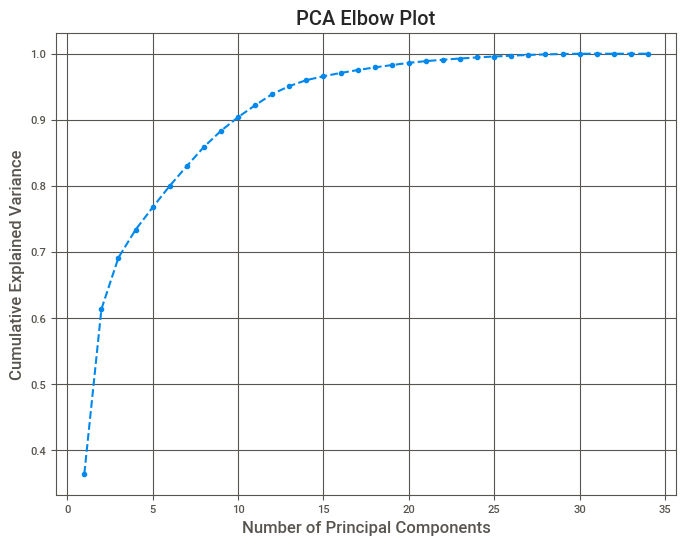

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(scaled_data)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid()
plt.show()


# Create a PCA instance and specify the number of components you want to retain
# For example, if you want to retain 10 components, set n_components=10
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data and transform it
transformed_data_pca = pca.fit_transform(scaled_data)

# The variable 'transformed_data_pca' now contains your data in the reduced-dimensional space with 'n_components' principal components.

# You can also access explained variance to see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

In [ ]:
# the variances of the pca that we extract and there importance in predicting the output
explained_variance

array([0.36404087, 0.24922522, 0.0781616 , 0.04203136, 0.03386996,
       0.03261038, 0.02991371, 0.02898358, 0.02444014, 0.02058626])

In [ ]:
#calculating the total of  explained_variance  which needs to be more than 90%
explained_variance.sum()

0.9038630814585793

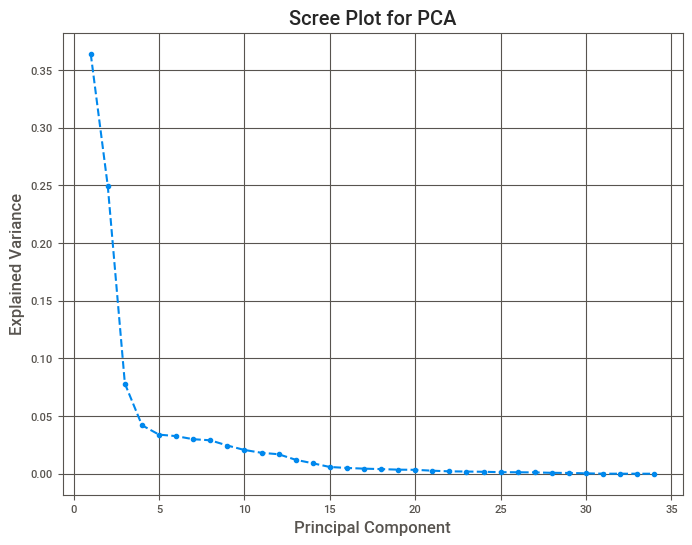

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(scaled_data)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()
plt.show()


In [ ]:
#examining the shape after pca
transformed_data_pca.shape

(19735, 10)

In [ ]:
transformed_data_pca

array([[-4.16761155e+00,  4.47378727e+00, -1.60369153e+00, ...,
        -1.70232369e+00, -1.75634960e-01,  1.34881813e-01],
       [-4.19072903e+00,  4.40142095e+00, -1.54728522e+00, ...,
        -1.68471216e+00, -1.82744702e-01,  1.30603605e-01],
       [-4.25250098e+00,  4.31023297e+00, -1.40238338e+00, ...,
        -1.51052053e+00, -2.69521894e-01,  2.57947290e-01],
       ...,
       [ 7.82588108e+00,  4.33853912e+00, -1.74644952e+00, ...,
         8.59465646e-01, -1.14889402e-03, -9.21373157e-01],
       [ 7.76157792e+00,  4.32926201e+00, -1.73462038e+00, ...,
         7.64826780e-01, -3.09184116e-03, -8.92939223e-01],
       [ 7.64136416e+00,  4.23084484e+00, -1.63183756e+00, ...,
         6.89404794e-01, -9.26706276e-02, -8.47926811e-01]])

Data Splitting

In [ ]:
#assinign the independent and dependent feature
x = transformed_data_pca
y = data['Appliances']

In [ ]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

Model Implementation

Simple Linear Regression Model

In [ ]:
#importing the mdoel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#defining the object
reg = LinearRegression()
reg.fit(x_train, y_train)

#training dataset score
training_score = reg.score(x_train, y_train)

#predicting the value
y_pred = reg.predict(x_test)

#calculating the training accuracy
print("Train score:" ,training_score)

#calculating the MSE
MSE  = mean_squared_error((y_test),(y_pred))
print("Test MSE :" , MSE)

#calculating the testing accuracy
r2 = r2_score((y_test),(y_pred))
print("Test R2 :" ,r2)

Train score: 0.6786223825901136
Test MSE : 568.8756256927858
Test R2 : 0.6842401042604458


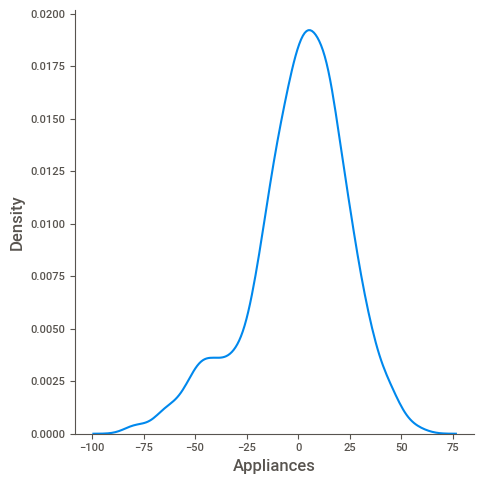

In [ ]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

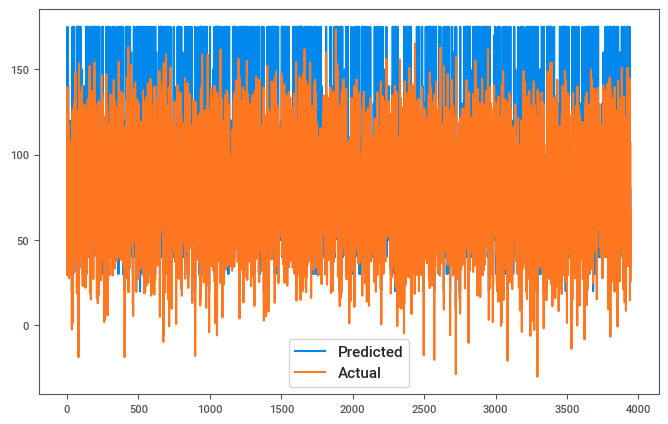

In [ ]:
#plot to compare the predicted values against the actual values.
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

Polynomial Regression model


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already split your data into x_train, x_test, y_train, and y_test

# Choose the degree of the polynomial (e.g., 2 for quadratic)
degree = 2

# Create a Polynomial Regression model using a pipeline
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
polyreg.fit(x_train, y_train)

# Predict on the test data
y_pred = polyreg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the R2 score for the training data
training_r2 = polyreg.score(x_train, y_train)

print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Training R-squared (R2) Score: 0.78
Mean Squared Error: 401.02
R-squared (R2) Score: 0.78


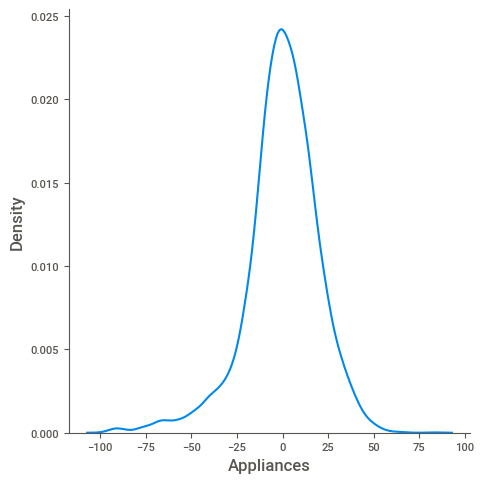

In [ ]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

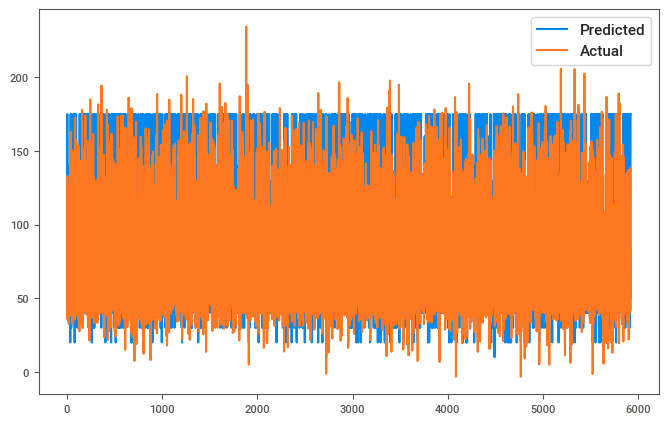

In [ ]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

Conclusion

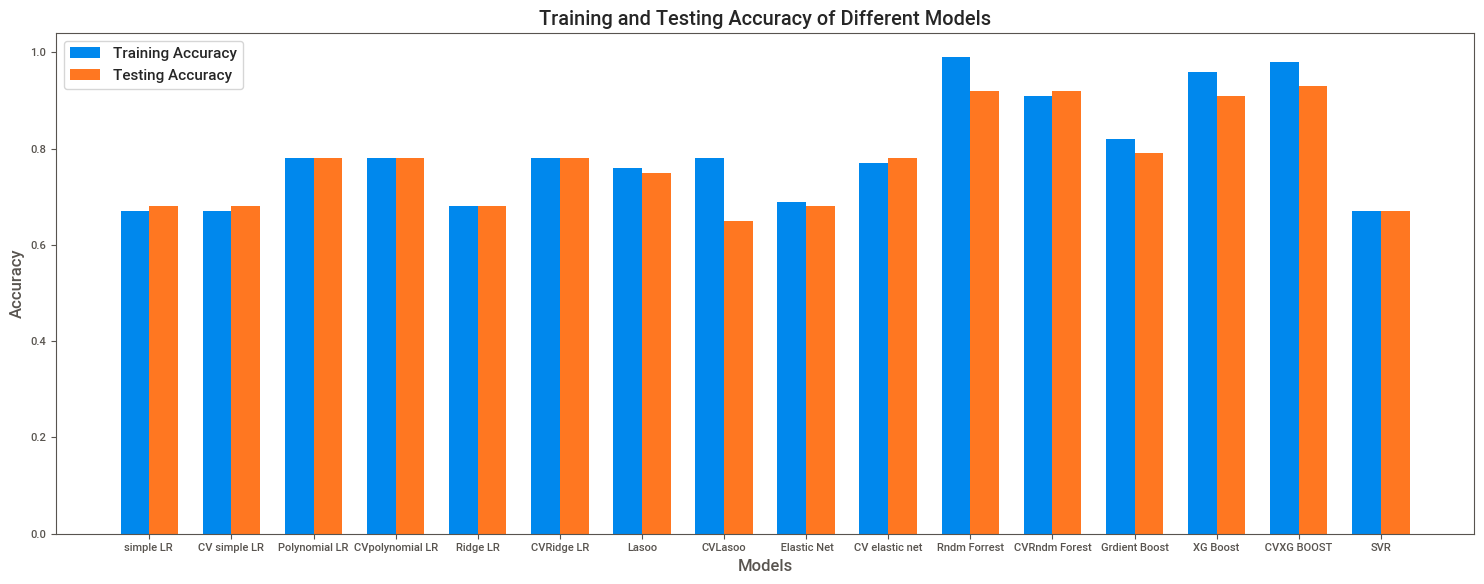

In [ ]:
import matplotlib.pyplot as plt

# Define the model names (you can adjust these as needed)
model_names = ["simple LR ", "CV simple LR", "Polynomial LR", "CVpolynomial LR", "Ridge LR", "CVRidge LR","Lasoo","CVLasoo"," Elastic Net", "CV elastic net",
               "Rndm Forrest","CVRndm Forest","Grdient Boost", "XG Boost", " CVXG BOOST ", "SVR"]

# Define the training and testing accuracy values for each
training_accuracy =[0.67, 0.67, 0.78, 0.78, 0.68, 0.78, 0.76, 0.78, 0.69, 0.77, 0.99, 0.91, 0.82, 0.96, 0.98 , 0.67]
testing_accuracy = [0.68, 0.68, 0.78, 0.78, 0.68, 0.78, 0.75, 0.65, 0.68, 0.78, 0.92, 0.92, 0.79, 0.91, 0.93 ,0.67]

# Set the width of the bars and their positions
width = 0.35
x = range(len(model_names))

# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(x, training_accuracy, width, label='Training Accuracy')
plt.bar([i + width for i in x], testing_accuracy, width, label='Testing Accuracy')

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Different Models')
plt.xticks([i + width / 2 for i in x], model_names)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
